# Problem 1 — One-Dimensional Bin Packing for E-commerce Fulfillment Using Ant Colony Optimization (ACO)



########## FILE: Binpacks/binpack2.txt ##########

=== Running instance: u250_00  (n_items=250, capacity=150) ===
FFD baseline bins = 100
[Iter 50/200] iter-best bins=100, global-best bins=100, alpha=0.75, rho=0.238
[Iter 100/200] iter-best bins=100, global-best bins=100, alpha=1.00, rho=0.176
[Iter 150/200] iter-best bins=100, global-best bins=100, alpha=1.25, rho=0.113
[Iter 200/200] iter-best bins=100, global-best bins=100, alpha=1.50, rho=0.050
ACO best bins = 100, unused capacity = 217
Runtime = 12.37s


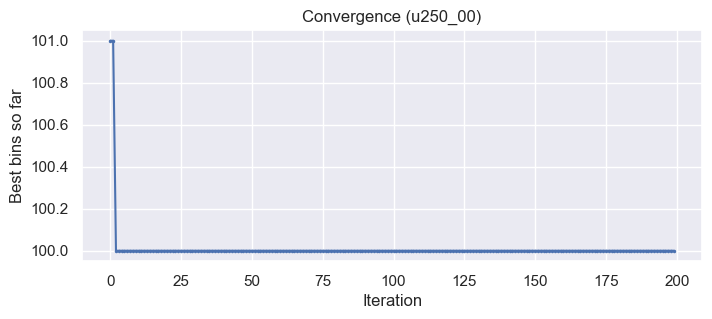

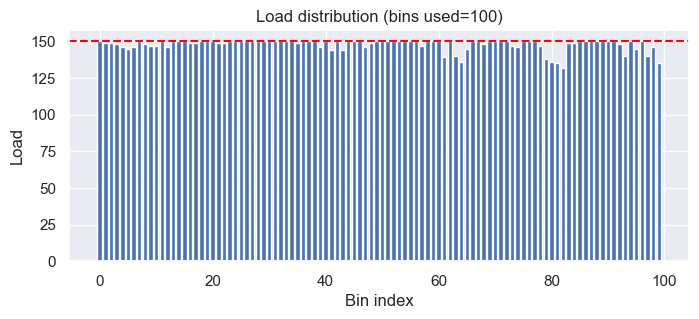


=== Running instance: u250_01  (n_items=250, capacity=150) ===
FFD baseline bins = 101
[Iter 50/200] iter-best bins=101, global-best bins=101, alpha=0.75, rho=0.238
[Iter 100/200] iter-best bins=101, global-best bins=101, alpha=1.00, rho=0.176
[Iter 150/200] iter-best bins=101, global-best bins=101, alpha=1.25, rho=0.113
[Iter 200/200] iter-best bins=101, global-best bins=101, alpha=1.50, rho=0.050
ACO best bins = 101, unused capacity = 296
Runtime = 12.61s


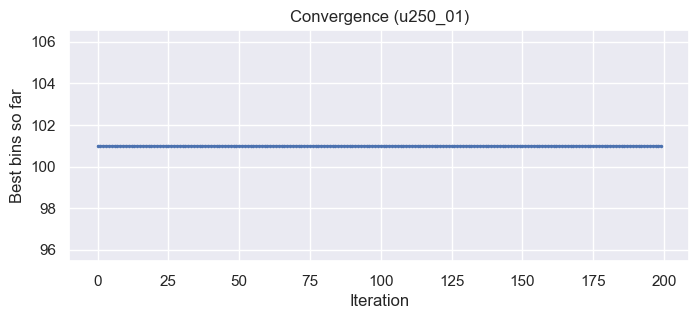

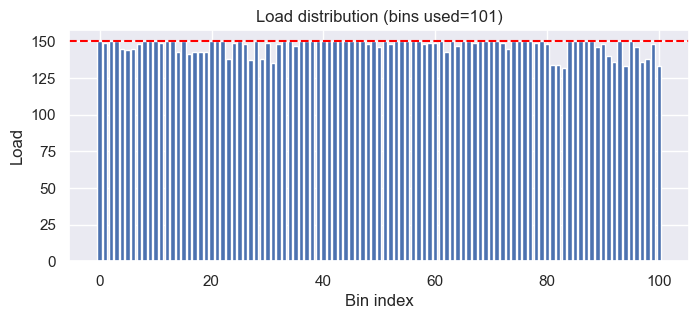


=== Running instance: u250_02  (n_items=250, capacity=150) ===
FFD baseline bins = 104
[Iter 50/200] iter-best bins=103, global-best bins=103, alpha=0.75, rho=0.238
[Iter 100/200] iter-best bins=103, global-best bins=103, alpha=1.00, rho=0.176
[Iter 150/200] iter-best bins=103, global-best bins=103, alpha=1.25, rho=0.113
[Iter 200/200] iter-best bins=103, global-best bins=103, alpha=1.50, rho=0.050
ACO best bins = 103, unused capacity = 237
Runtime = 14.03s


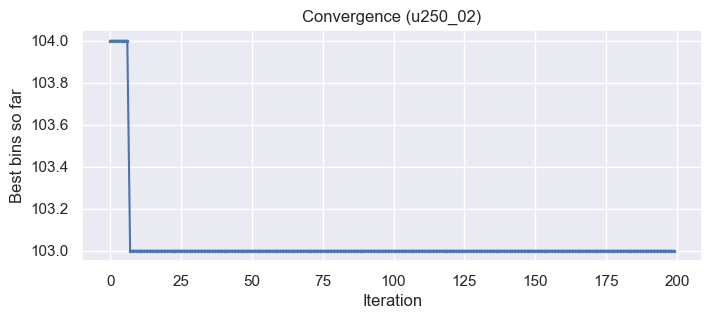

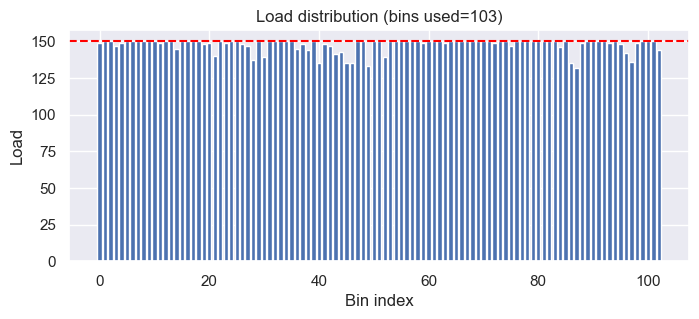


=== Running instance: u250_03  (n_items=250, capacity=150) ===
FFD baseline bins = 101
[Iter 50/200] iter-best bins=101, global-best bins=101, alpha=0.75, rho=0.238
[Iter 100/200] iter-best bins=101, global-best bins=101, alpha=1.00, rho=0.176
[Iter 150/200] iter-best bins=101, global-best bins=101, alpha=1.25, rho=0.113
[Iter 200/200] iter-best bins=101, global-best bins=101, alpha=1.50, rho=0.050
ACO best bins = 101, unused capacity = 236
Runtime = 12.95s


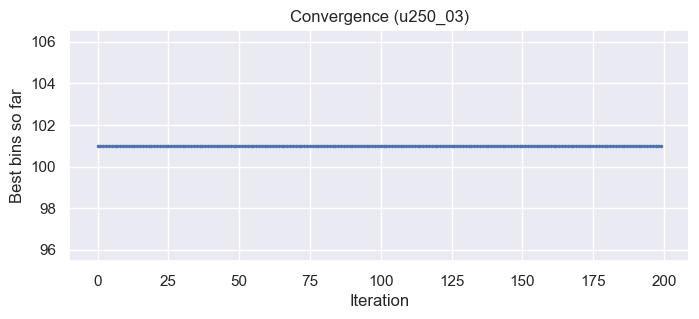

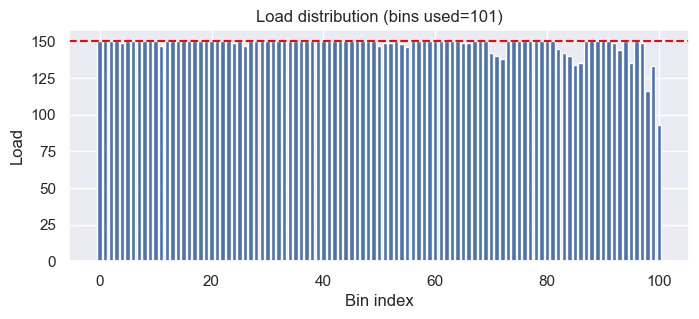


=== Running instance: u250_04  (n_items=250, capacity=150) ===
FFD baseline bins = 102
[Iter 50/200] iter-best bins=102, global-best bins=102, alpha=0.75, rho=0.238
[Iter 100/200] iter-best bins=102, global-best bins=102, alpha=1.00, rho=0.176
[Iter 150/200] iter-best bins=102, global-best bins=102, alpha=1.25, rho=0.113
[Iter 200/200] iter-best bins=102, global-best bins=102, alpha=1.50, rho=0.050
ACO best bins = 102, unused capacity = 208
Runtime = 12.78s


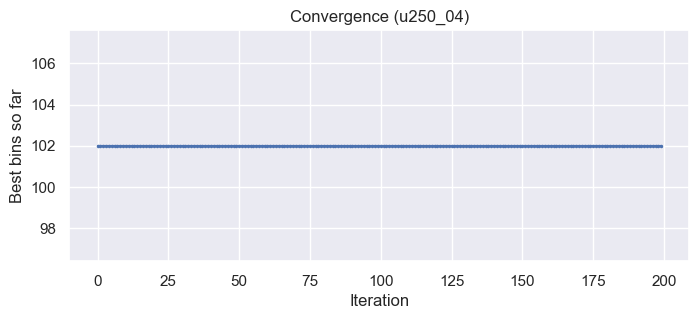

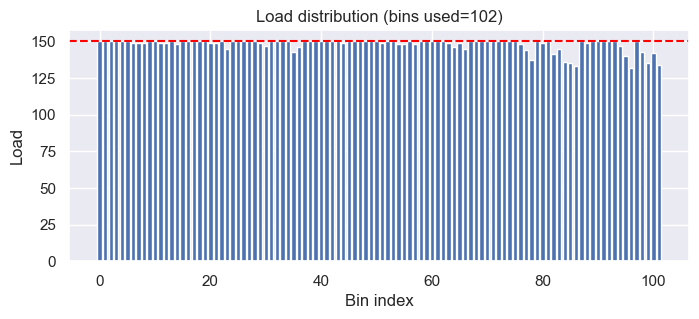


=== Running instance: u250_05  (n_items=250, capacity=150) ===
FFD baseline bins = 104
[Iter 50/200] iter-best bins=103, global-best bins=103, alpha=0.75, rho=0.238
[Iter 100/200] iter-best bins=103, global-best bins=103, alpha=1.00, rho=0.176
[Iter 150/200] iter-best bins=103, global-best bins=103, alpha=1.25, rho=0.113
[Iter 200/200] iter-best bins=103, global-best bins=103, alpha=1.50, rho=0.050
ACO best bins = 103, unused capacity = 326
Runtime = 14.69s


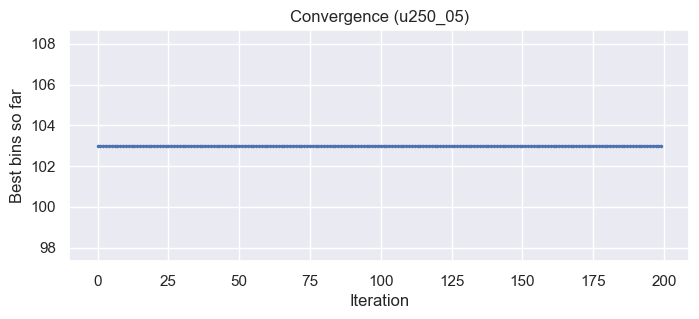

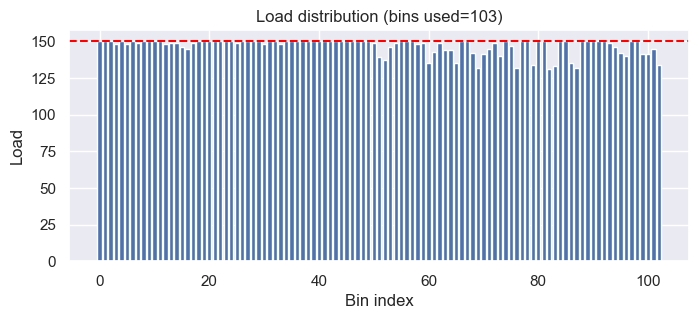


=== Running instance: u250_06  (n_items=250, capacity=150) ===
FFD baseline bins = 103
[Iter 50/200] iter-best bins=103, global-best bins=103, alpha=0.75, rho=0.238
[Iter 100/200] iter-best bins=103, global-best bins=103, alpha=1.00, rho=0.176
[Iter 150/200] iter-best bins=103, global-best bins=103, alpha=1.25, rho=0.113
[Iter 200/200] iter-best bins=103, global-best bins=103, alpha=1.50, rho=0.050
ACO best bins = 103, unused capacity = 296
Runtime = 13.40s


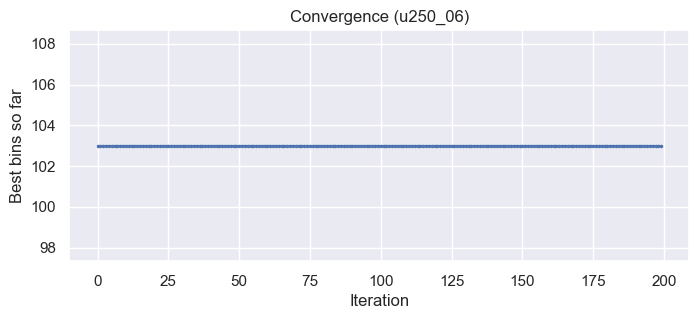

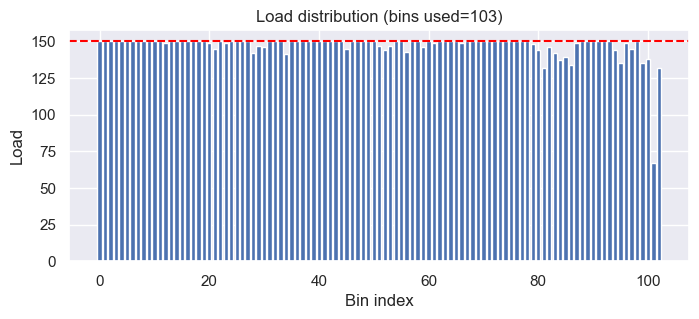


=== Running instance: u250_07  (n_items=250, capacity=150) ===
FFD baseline bins = 105
[Iter 50/200] iter-best bins=105, global-best bins=105, alpha=0.75, rho=0.238
[Iter 100/200] iter-best bins=105, global-best bins=105, alpha=1.00, rho=0.176
[Iter 150/200] iter-best bins=105, global-best bins=105, alpha=1.25, rho=0.113
[Iter 200/200] iter-best bins=105, global-best bins=105, alpha=1.50, rho=0.050
ACO best bins = 105, unused capacity = 332
Runtime = 12.80s


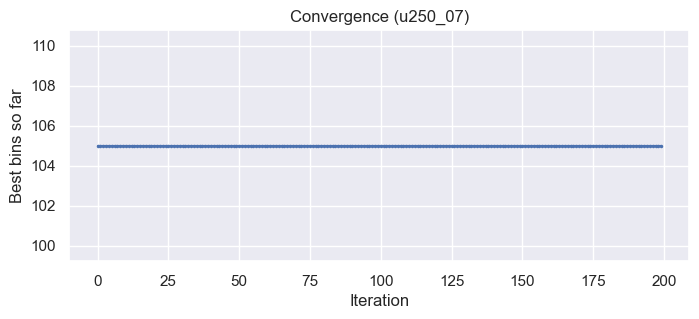

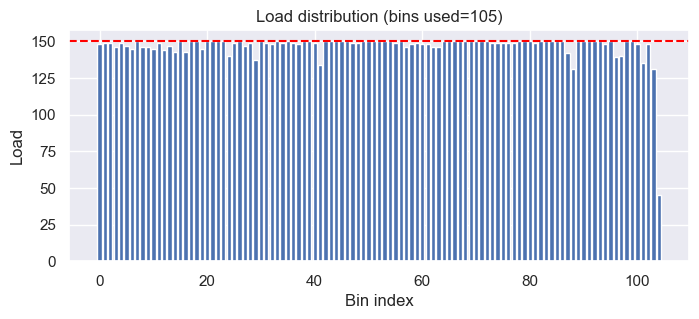

In [1]:
# --- Imports & Small utilities ---
import math
import random
import time
from collections import defaultdict, Counter
from typing import List, Tuple

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

# --- Config / Hyperparameters ---
CONFIG = {
    "alpha_start": 0.5,
    "alpha_end": 1.5,
    "beta": 2.0,
    "rho_start": 0.3,
    "rho_end": 0.05,
    "Q": 1.0,
    "n_ants": 30,
    "iterations": 200,
    "seed": 42,
    "use_first_fit_decreasing_init": True,
    "max_bins_scale": 1.0,
    "print_every": 50,   # CHANGED from 10 → 50
    "verbose": True,
    "tau_min": 0.01,
}

random.seed(CONFIG["seed"])
np.random.seed(CONFIG["seed"])

# --- Parser for OR-Library `binpack` files ---
def parse_orlib_binpack_file(text: str):
    tokens = text.split()
    idx = 0
    P = int(tokens[idx])
    idx += 1
    instances = []
    for _ in range(P):
        name = tokens[idx]
        idx += 1
        capacity = int(tokens[idx])
        idx += 1
        n_items = int(tokens[idx])
        idx += 1
        _best_known = tokens[idx]
        idx += 1
        items = []
        for i in range(n_items):
            items.append(int(tokens[idx]))
            idx += 1
        instances.append((name, capacity, items))
    return instances

# --- Baseline heuristic: First-Fit Decreasing (FFD) ---
def first_fit_decreasing(items: List[int], capacity: int) -> Tuple[int, List[List[int]]]:
    items_sorted = sorted(items, reverse=True)
    bins = []
    bin_caps = []
    for w in items_sorted:
        placed = False
        for i, rem in enumerate(bin_caps):
            if rem >= w:
                bins[i].append(w)
                bin_caps[i] -= w
                placed = True
                break
        if not placed:
            bins.append([w])
            bin_caps.append(capacity - w)
    return len(bins), bins

# --- ACOBinPacking class with adaptive parameters and better initialization ---
class ACOBinPacking:
    def __init__(self, items: List[int], capacity: int, config: dict):
        self.items = list(items)
        self.capacity = capacity
        self.n = len(items)
        self.config = config.copy()
        self.max_bins = max(1, int(self.n * max(1.0, config.get("max_bins_scale", 1.0))))
        self.item_order = sorted(range(self.n), key=lambda i: -self.items[i])
        tau_init = max(self.config.get("tau_min", 0.01), 0.01)
        self.tau = np.ones((self.n, self.max_bins)) * tau_init
        # parameters for adaptation during run
        self.alpha_start = self.config.get("alpha_start", 1.0)
        self.alpha_end = self.config.get("alpha_end", 1.0)
        self.beta = self.config.get("beta", 2.0)
        self.rho_start = self.config.get("rho_start", 0.1)
        self.rho_end = self.config.get("rho_end", 0.1)
        self.Q = self.config.get("Q", 1.0)

    def construct_solution(self, ant_seed=None):
        if ant_seed is not None:
            rand = random.Random(ant_seed)
        else:
            rand = random

        assignments = [-1] * self.n
        bins_loads = []
        bins_items = []

        for item_pos in self.item_order:
            w = self.items[item_pos]
            feasible_bins = []
            heuristics = []
            taus = []

            for b_idx, load in enumerate(bins_loads):
                rem = self.capacity - load
                if rem >= w:
                    remaining_after = rem - w
                    eta = 1.0 / (1.0 + remaining_after)
                    feasible_bins.append(b_idx)
                    heuristics.append(eta)
                    taus.append(self.tau[item_pos, b_idx])

            if len(bins_loads) < self.max_bins:
                remaining_after = self.capacity - w
                eta_new = 1.0 / (1.0 + remaining_after)
                new_slot_idx = len(bins_loads)
                feasible_bins.append(new_slot_idx)
                heuristics.append(eta_new)
                taus.append(self.tau[item_pos, new_slot_idx])

            if not feasible_bins:
                new_slot_idx = len(bins_loads)
                feasible_bins.append(new_slot_idx)
                heuristics.append(1.0 / (1.0 + (self.capacity - w)))
                taus.append(self.tau[item_pos, new_slot_idx] if new_slot_idx < self.max_bins else 0.1)

            tau_arr = np.array(taus) ** self.alpha
            eta_arr = np.array(heuristics) ** self.beta
            probs = tau_arr * eta_arr
            if probs.sum() == 0:
                probs = np.ones_like(probs)
            probs = probs / probs.sum()

            choice_idx = rand.choices(range(len(feasible_bins)), weights=probs, k=1)[0]
            chosen_bin = feasible_bins[choice_idx]

            if chosen_bin == len(bins_loads):
                bins_loads.append(w)
                bins_items.append([self.items[item_pos]])
            else:
                bins_loads[chosen_bin] += w
                bins_items[chosen_bin].append(self.items[item_pos])

            assignments[item_pos] = chosen_bin

        bins_used = len(bins_loads)
        total_unused = sum(self.capacity - load for load in bins_loads)
        return assignments, bins_items, bins_used, total_unused

    def local_repair_try_free_bin(self, bins_items: List[List[int]]) -> Tuple[List[List[int]], int]:
        bins = [list(b) for b in bins_items]
        loads = [sum(b) for b in bins]
        changed = True
        while changed:
            changed = False
            for i in range(len(bins)):
                if not bins[i]:
                    continue
                items_i = bins[i][:]
                can_move_all = True
                for w in items_i:
                    moved = False
                    for j in range(len(bins)):
                        if j == i:
                            continue
                        if sum(bins[j]) + w <= self.capacity:
                            bins[j].append(w)
                            bins[i].remove(w)
                            moved = True
                            break
                    if not moved:
                        can_move_all = False
                        break
                if can_move_all and len(bins[i]) == 0:
                    changed = True
                    bins.pop(i)
                    break
                else:
                    bins = [list(b) for b in bins_items]
                    break
        new_bins = [b for b in bins if b]
        return new_bins, len(new_bins)

    def run(self, n_ants: int, iterations: int, local_repair: bool=True, verbose: bool=False):
        best_solution = None
        best_history = []
        start_time = time.time()

        for it in range(1, iterations+1):
            # Adaptive alpha and rho (linear interpolation)
            self.alpha = self.alpha_start + (self.alpha_end - self.alpha_start) * (it - 1) / (iterations - 1)
            self.rho = self.rho_start + (self.rho_end - self.rho_start) * (it - 1) / (iterations - 1)

            ant_solutions = []
            for a in range(n_ants):
                seed = random.randint(0, 10**9)
                assign, bins_items, bins_used, total_unused = self.construct_solution(ant_seed=seed)
                if local_repair:
                    improved_bins, improved_used = self.local_repair_try_free_bin(bins_items)
                    if improved_used < bins_used:
                        bins_items = improved_bins
                        bins_used = improved_used
                        total_unused = sum(self.capacity - sum(b) for b in bins_items)
                ant_solutions.append((bins_used, total_unused, bins_items, assign))

            ant_solutions.sort(key=lambda x: (x[0], x[1]))
            best_ant = ant_solutions[0]
            b_used, b_unused, b_bins, b_assign = best_ant

            if (best_solution is None) or (b_used < best_solution[0]) or (b_used == best_solution[0] and b_unused < best_solution[1]):
                best_solution = (b_used, b_unused, b_bins, b_assign)

            best_history.append(best_solution[0])

            self.tau *= (1.0 - self.rho)

            for item_i, bin_j in enumerate(b_assign):
                if bin_j < self.max_bins:
                    self.tau[item_i, bin_j] += (self.Q / max(1, best_solution[0]))

            if verbose and (it % self.config.get("print_every", 10) == 0):
                print(f"[Iter {it}/{iterations}] iter-best bins={b_used}, global-best bins={best_solution[0]}, alpha={self.alpha:.2f}, rho={self.rho:.3f}")

        wall_time = time.time() - start_time
        return {
            "best_bins": best_solution[0],
            "best_unused": best_solution[1],
            "best_bins_items": best_solution[2],
            "best_assignments": best_solution[3],
            "history": best_history,
            "time_sec": wall_time
        }

# --- Experiment harness ---
def run_single_instance(name: str, items: List[int], capacity: int, config: dict):
    print(f"\n=== Running instance: {name}  (n_items={len(items)}, capacity={capacity}) ===")
    ffd_bins, ffd_bins_items = first_fit_decreasing(items, capacity)
    print(f"FFD baseline bins = {ffd_bins}")

    aco = ACOBinPacking(items, capacity, config)
    res = aco.run(n_ants=config["n_ants"], iterations=config["iterations"], local_repair=True, verbose=config.get("verbose", False))

    print(f"ACO best bins = {res['best_bins']}, unused capacity = {res['best_unused']}")
    print(f"Runtime = {res['time_sec']:.2f}s")

    plt.figure(figsize=(8,3))
    plt.plot(res["history"], marker=".", markersize=3)
    plt.xlabel("Iteration")
    plt.ylabel("Best bins so far")
    plt.title(f"Convergence ({name})")
    plt.show()

    bins_items = res["best_bins_items"]
    loads = [sum(b) for b in bins_items]
    plt.figure(figsize=(8,3))
    plt.bar(range(len(loads)), loads)
    plt.axhline(capacity, color='red', linestyle='--')
    plt.xlabel("Bin index")
    plt.ylabel("Load")
    plt.title(f"Load distribution (bins used={res['best_bins']})")
    plt.show()

    return res

# --- MAIN RUN ---
if __name__ == "__main__":
    filename = f"Binpacks/binpack2.txt"
    print(f"\n\n########## FILE: {filename} ##########")

    with open(filename, "r") as f:
        text = f.read()

    # Parse file
    instances = parse_orlib_binpack_file(text)

    # Run ONLY the first 3 instances in each file
    for name, capacity, items in instances[:8]:
        run_single_instance(name, items, capacity, CONFIG)

# Problem 2 — Optimize Classic Benchmark Functions using Particle Swarm Optimization (PSO)

Starting Problem 2 - PSO Optimization...
Loading libraries...
Libraries loaded successfully!

BEGINNING PSO OPTIMIZATION ON ALL BENCHMARK FUNCTIONS
Configuration: 30 particles, 2D, 1000 iterations


Optimizing: Sphere
Dimensions: 2
Particles: 30
Bounds: (-5.12, 5.12)
Global minimum: 0.0
Iteration 100/1000: Best value = 7.010774e-14, Position = [-2.51412541e-07 -8.30630737e-08]
Iteration 200/1000: Best value = 3.691659e-23, Position = [-4.69432988e-12  3.85744242e-12]
Iteration 300/1000: Best value = 1.980408e-34, Position = [ 1.22623948e-17 -6.90466859e-18]
Iteration 400/1000: Best value = 1.155851e-41, Position = [-1.42810568e-22  3.39678013e-21]
Iteration 500/1000: Best value = 8.743502e-52, Position = [-1.21436146e-26 -2.69607653e-26]
Iteration 600/1000: Best value = 2.792445e-62, Position = [-1.54281808e-31 -6.41994829e-32]
Iteration 700/1000: Best value = 4.978584e-72, Position = [-2.21603986e-36  2.60290120e-37]
Iteration 800/1000: Best value = 1.063825e-80, Position = [8.4166284

<Figure size 1000x600 with 0 Axes>

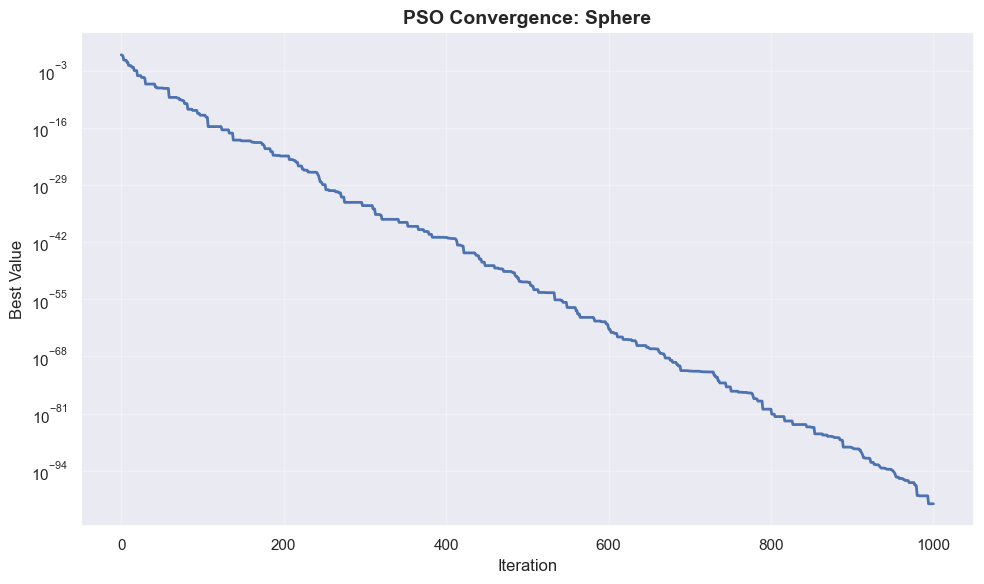


Optimizing: Rosenbrock
Dimensions: 2
Particles: 30
Bounds: (-2.048, 2.048)
Global minimum: 0.0
Iteration 100/1000: Best value = 1.452666e-06, Position = [0.99919356 0.99829819]
Iteration 200/1000: Best value = 9.998140e-11, Position = [0.99999121 0.99998195]
Iteration 300/1000: Best value = 3.788253e-13, Position = [1.00000059 1.0000012 ]
Iteration 400/1000: Best value = 1.202040e-16, Position = [1.00000001 1.00000002]
Iteration 500/1000: Best value = 1.107167e-20, Position = [1. 1.]
Iteration 600/1000: Best value = 3.949641e-23, Position = [1. 1.]
Iteration 700/1000: Best value = 1.239478e-25, Position = [1. 1.]
Iteration 800/1000: Best value = 5.360556e-29, Position = [1. 1.]
Iteration 900/1000: Best value = 1.232595e-32, Position = [1. 1.]
Iteration 1000/1000: Best value = 0.000000e+00, Position = [1. 1.]

Results:
  Best value found: 0.000000e+00
  Global minimum: 0.000000e+00
  Error: 0.000000e+00
  Best position: [1. 1.]
  Runtime: 0.30 seconds


<Figure size 1000x600 with 0 Axes>

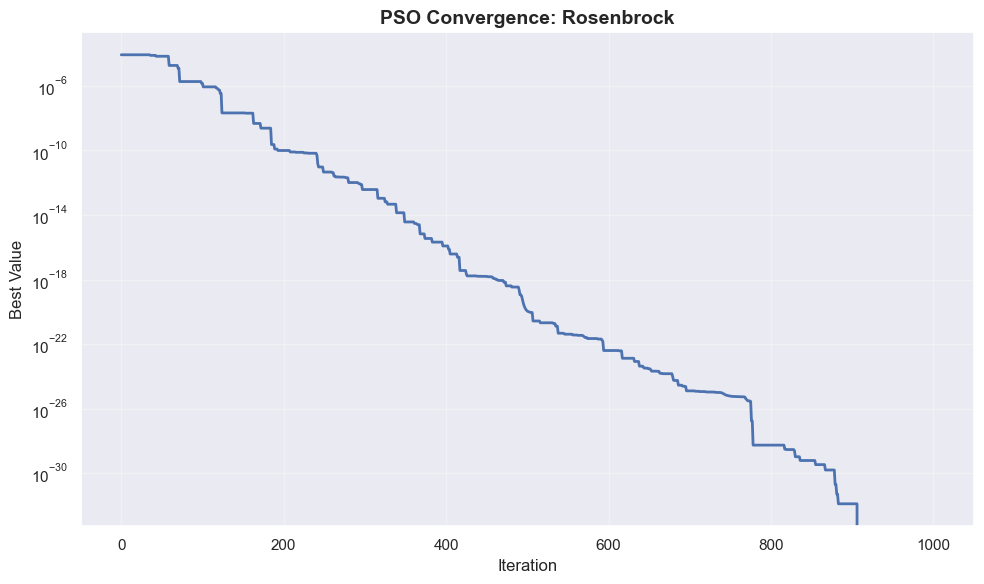


Optimizing: Rastrigin
Dimensions: 2
Particles: 30
Bounds: (-5.12, 5.12)
Global minimum: 0.0
Iteration 100/1000: Best value = 1.832277e-09, Position = [-1.43023813e-06 -2.68142695e-06]
Iteration 200/1000: Best value = 0.000000e+00, Position = [-1.8204384e-09 -1.3014894e-09]
Iteration 300/1000: Best value = 0.000000e+00, Position = [-1.8204384e-09 -1.3014894e-09]
Iteration 400/1000: Best value = 0.000000e+00, Position = [-1.8204384e-09 -1.3014894e-09]
Iteration 500/1000: Best value = 0.000000e+00, Position = [-1.8204384e-09 -1.3014894e-09]
Iteration 600/1000: Best value = 0.000000e+00, Position = [-1.8204384e-09 -1.3014894e-09]
Iteration 700/1000: Best value = 0.000000e+00, Position = [-1.8204384e-09 -1.3014894e-09]
Iteration 800/1000: Best value = 0.000000e+00, Position = [-1.8204384e-09 -1.3014894e-09]
Iteration 900/1000: Best value = 0.000000e+00, Position = [-1.8204384e-09 -1.3014894e-09]
Iteration 1000/1000: Best value = 0.000000e+00, Position = [-1.8204384e-09 -1.3014894e-09]

Res

<Figure size 1000x600 with 0 Axes>

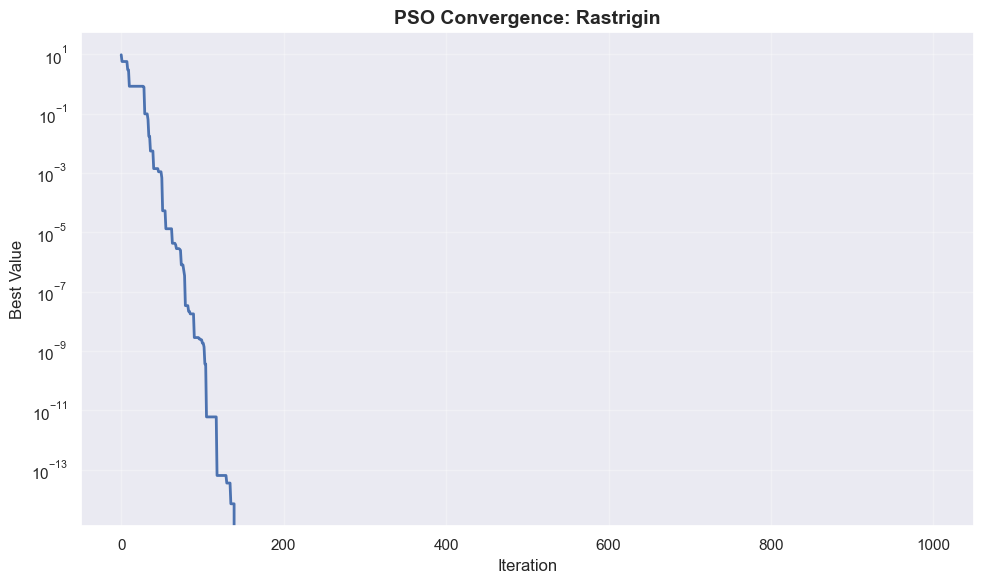


Optimizing: Ackley
Dimensions: 2
Particles: 30
Bounds: (-32, 32)
Global minimum: 0.0
Iteration 100/1000: Best value = 8.542725e-07, Position = [2.23724519e-07 2.02902705e-07]
Iteration 200/1000: Best value = 5.541922e-11, Position = [-1.48621669e-11 -1.27686037e-11]
Iteration 300/1000: Best value = 3.996803e-15, Position = [8.70982478e-16 9.06832355e-16]
Iteration 400/1000: Best value = 4.440892e-16, Position = [7.80385300e-18 3.55269762e-16]
Iteration 500/1000: Best value = 4.440892e-16, Position = [7.80385300e-18 3.55269762e-16]
Iteration 600/1000: Best value = 4.440892e-16, Position = [7.80385300e-18 3.55269762e-16]
Iteration 700/1000: Best value = 4.440892e-16, Position = [7.80385300e-18 3.55269762e-16]
Iteration 800/1000: Best value = 4.440892e-16, Position = [7.80385300e-18 3.55269762e-16]
Iteration 900/1000: Best value = 4.440892e-16, Position = [7.80385300e-18 3.55269762e-16]
Iteration 1000/1000: Best value = 4.440892e-16, Position = [7.80385300e-18 3.55269762e-16]

Results:
 

<Figure size 1000x600 with 0 Axes>

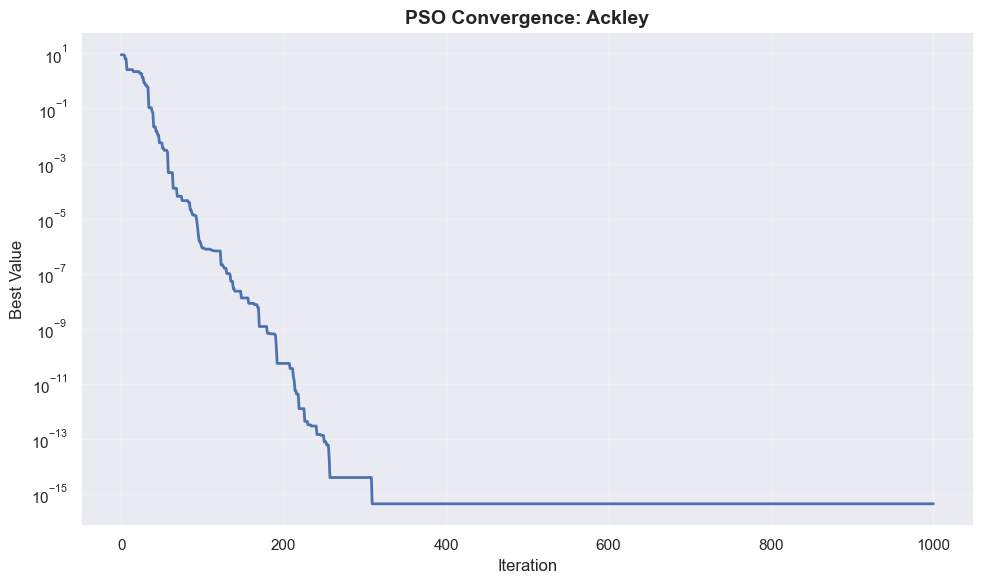


Optimizing: Griewank
Dimensions: 2
Particles: 30
Bounds: (-600, 600)
Global minimum: 0.0
Iteration 100/1000: Best value = 7.398632e-03, Position = [3.14221759 4.43759301]
Iteration 200/1000: Best value = 7.396040e-03, Position = [3.14002263 4.43844459]
Iteration 300/1000: Best value = 7.396040e-03, Position = [3.14002264 4.43844449]
Iteration 400/1000: Best value = 7.396040e-03, Position = [3.14002264 4.43844449]
Iteration 500/1000: Best value = 7.396040e-03, Position = [3.14002264 4.43844449]
Iteration 600/1000: Best value = 7.396040e-03, Position = [3.14002264 4.43844449]
Iteration 700/1000: Best value = 3.078968e-05, Position = [0.00373631 0.00975349]
Iteration 800/1000: Best value = 7.438494e-15, Position = [ 1.17411493e-08 -1.71547689e-07]
Iteration 900/1000: Best value = 0.000000e+00, Position = [-6.81690626e-09  6.72595941e-09]
Iteration 1000/1000: Best value = 0.000000e+00, Position = [-6.81690626e-09  6.72595941e-09]

Results:
  Best value found: 0.000000e+00
  Global minimum

<Figure size 1000x600 with 0 Axes>

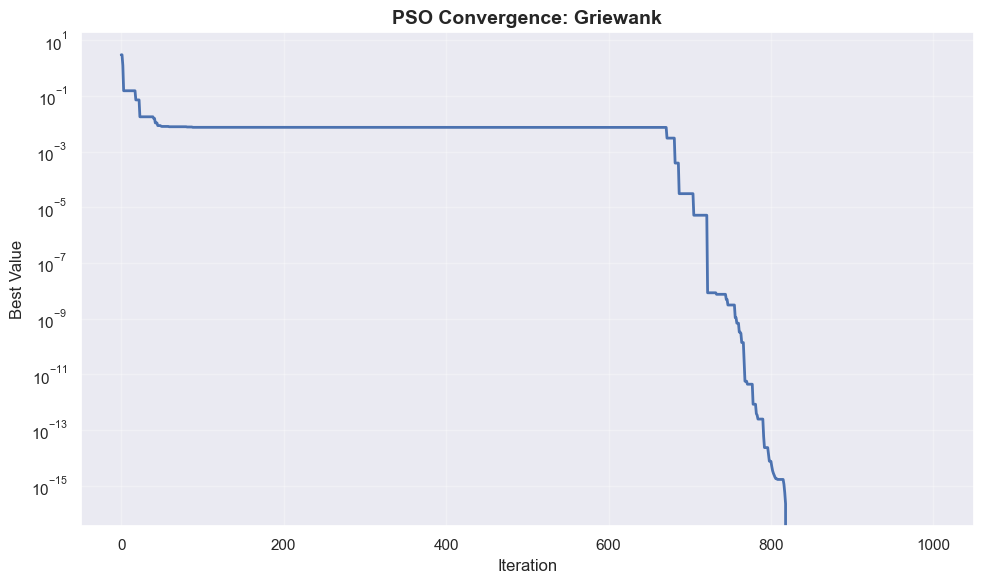


Optimizing: Schwefel
Dimensions: 2
Particles: 30
Bounds: (-500, 500)
Global minimum: 0.0
Iteration 100/1000: Best value = 1.184384e+02, Position = [ 420.96886731 -302.52415642]
Iteration 200/1000: Best value = 1.184384e+02, Position = [ 420.96874614 -302.52493512]
Iteration 300/1000: Best value = 1.184384e+02, Position = [ 420.96874614 -302.52493512]
Iteration 400/1000: Best value = 1.184384e+02, Position = [ 420.96874614 -302.52493512]
Iteration 500/1000: Best value = 1.184384e+02, Position = [ 420.96874614 -302.52493512]
Iteration 600/1000: Best value = 1.184384e+02, Position = [ 420.96874614 -302.52493512]
Iteration 700/1000: Best value = 1.184384e+02, Position = [ 420.96874614 -302.52493512]
Iteration 800/1000: Best value = 1.184384e+02, Position = [ 420.96874614 -302.52493512]
Iteration 900/1000: Best value = 1.184384e+02, Position = [ 420.96874614 -302.52493512]
Iteration 1000/1000: Best value = 1.184384e+02, Position = [ 420.96874614 -302.52493512]

Results:
  Best value found:

<Figure size 1000x600 with 0 Axes>

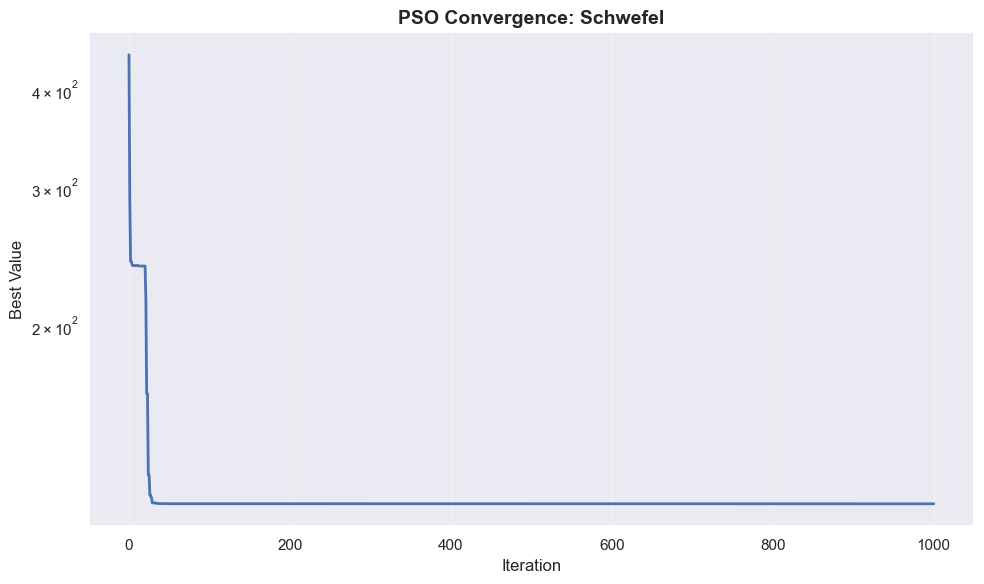


SUMMARY OF RESULTS
Function        Best Value           Error                Time (s)  
--------------------------------------------------------------------------------
Sphere          3.299241e-102        3.299241e-102        0.14      
Rosenbrock      0.000000e+00         0.000000e+00         0.30      
Rastrigin       0.000000e+00         0.000000e+00         0.26      
Ackley          4.440892e-16         4.440892e-16         0.44      
Griewank        0.000000e+00         0.000000e+00         0.34      
Schwefel        1.184384e+02         1.184384e+02         0.19      

GENERATING FINAL VISUALIZATIONS

[1/3] Combined Convergence Plot - All Functions


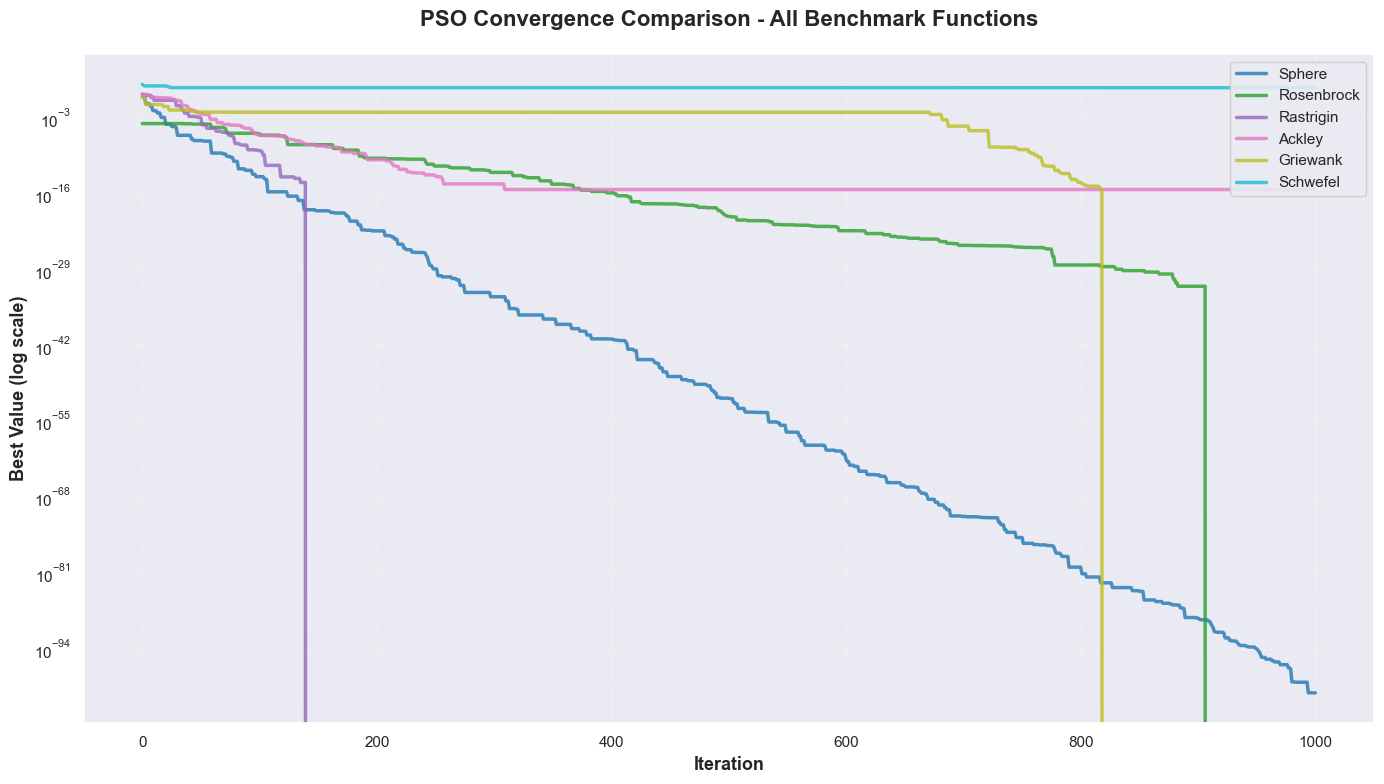


[2/3] Performance Comparison Charts


C:\Users\lauri\AppData\Local\Temp\ipykernel_42336\198014415.py:374: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


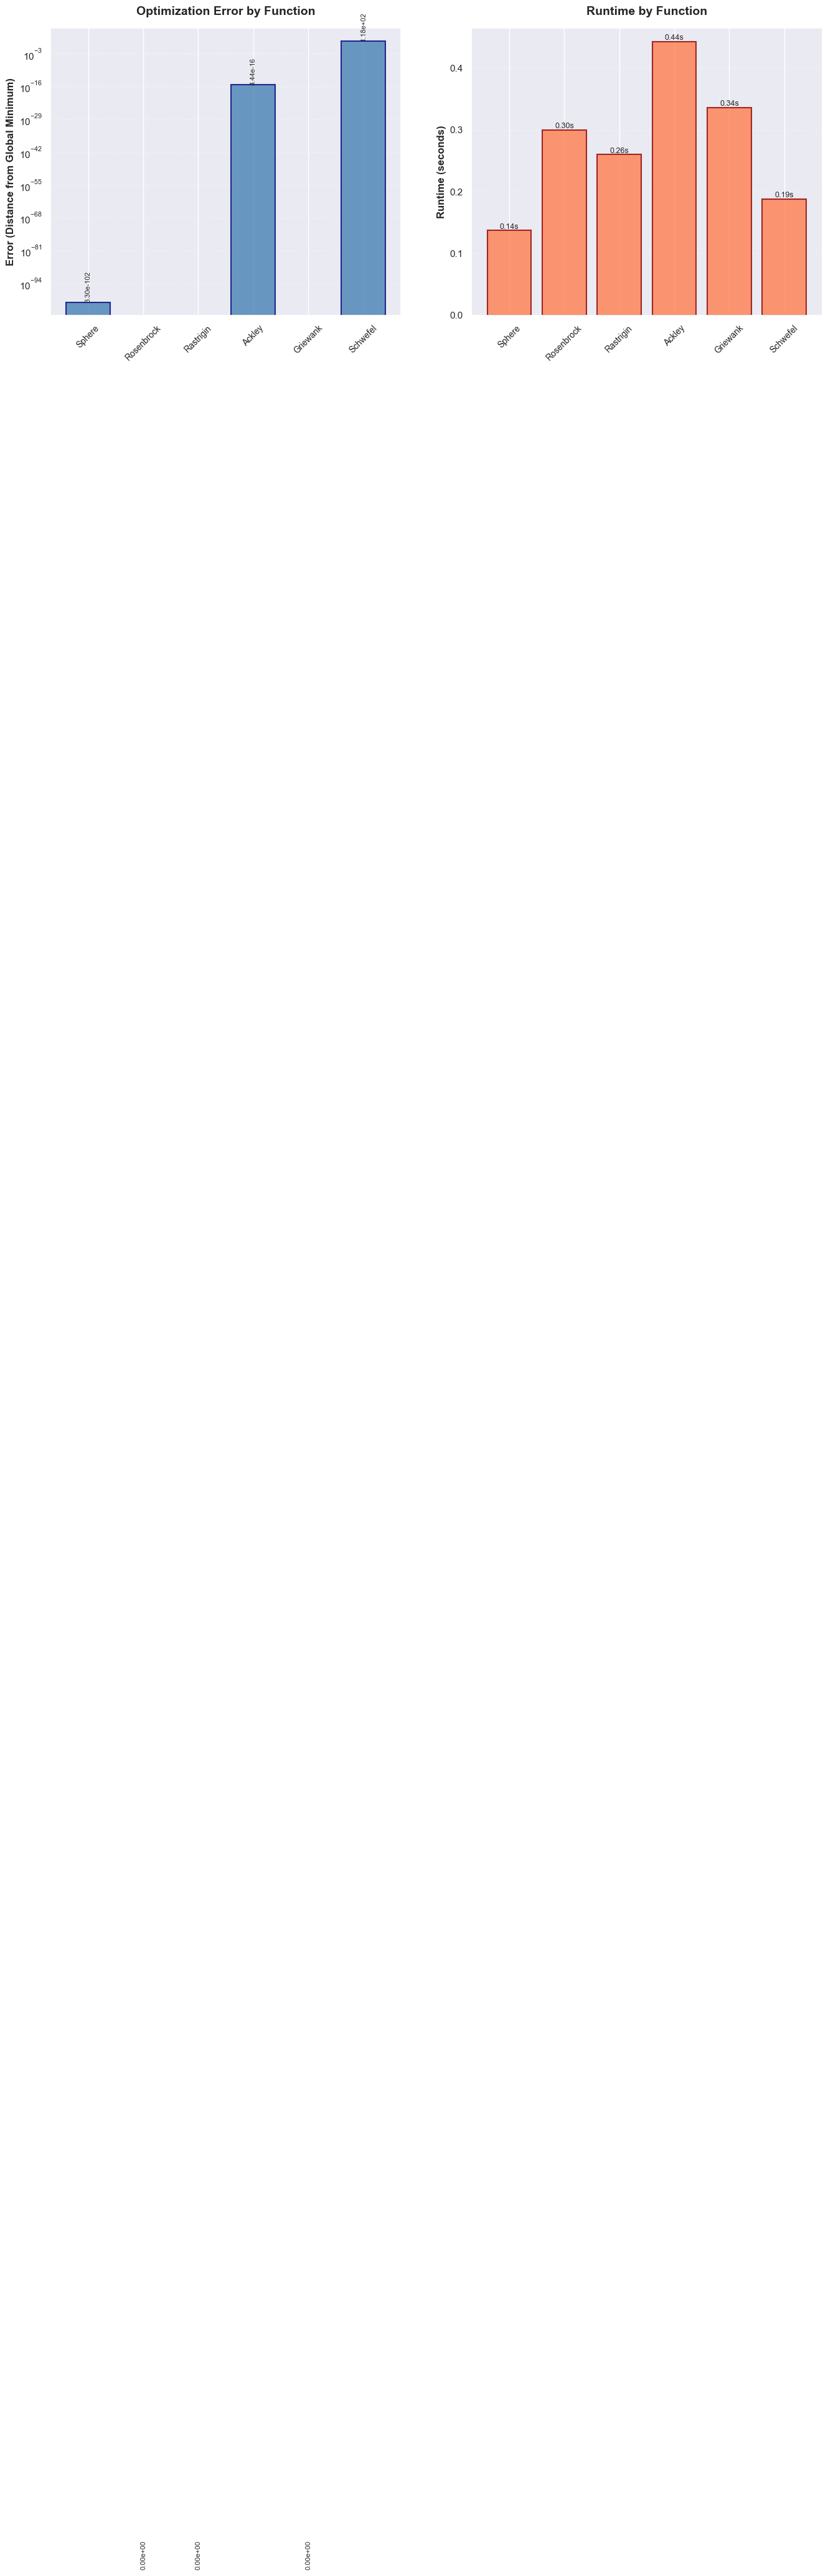


Problem 2 - PSO Optimization Complete!


In [2]:
# --- Imports ---
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Callable, Tuple, List
import time

# Configure matplotlib for notebook display
plt.rcParams['figure.max_open_warning'] = 0  # Suppress warning about too many open figures

print("Starting Problem 2 - PSO Optimization...")
print("Loading libraries...")

sns.set(style="darkgrid")

print("Libraries loaded successfully!")

# --- Configuration ---
CONFIG = {
    "n_particles": 30,        # Number of particles in swarm
    "n_dimensions": 2,         # Number of dimensions (can be 2, 10, 30, etc.)
    "max_iterations": 1000,    # Maximum iterations
    "w": 0.7,                 # Inertia weight
    "c1": 1.5,                # Cognitive coefficient
    "c2": 1.5,                # Social coefficient
    "seed": 42,
    "print_every": 100,
    "verbose": True,
}

np.random.seed(CONFIG["seed"])

# --- Benchmark Functions ---

def sphere(x: np.ndarray) -> float:
    """
    Sphere function: f(x) = sum(x_i^2)
    Global minimum: f(0, 0, ..., 0) = 0
    Search range: typically [-5.12, 5.12]
    """
    return np.sum(x**2)

def rosenbrock(x: np.ndarray) -> float:
    """
    Rosenbrock function (banana function)
    Global minimum: f(1, 1, ..., 1) = 0
    Search range: typically [-2.048, 2.048]
    """
    return np.sum(100.0 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

def rastrigin(x: np.ndarray) -> float:
    """
    Rastrigin function
    Global minimum: f(0, 0, ..., 0) = 0
    Search range: typically [-5.12, 5.12]
    """
    A = 10
    n = len(x)
    return A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x))

def ackley(x: np.ndarray) -> float:
    """
    Ackley function
    Global minimum: f(0, 0, ..., 0) = 0
    Search range: typically [-32, 32]
    """
    a = 20
    b = 0.2
    c = 2 * np.pi
    n = len(x)
    sum1 = np.sum(x**2)
    sum2 = np.sum(np.cos(c * x))
    return -a * np.exp(-b * np.sqrt(sum1 / n)) - np.exp(sum2 / n) + a + np.e

def griewank(x: np.ndarray) -> float:
    """
    Griewank function
    Global minimum: f(0, 0, ..., 0) = 0
    Search range: typically [-600, 600]
    """
    sum_sq = np.sum(x**2)
    prod = np.prod(np.cos(x / np.sqrt(np.arange(1, len(x) + 1))))
    return 1 + sum_sq / 4000 - prod

def schwefel(x: np.ndarray) -> float:
    """
    Schwefel function
    Global minimum: f(420.9687, ..., 420.9687) ≈ 0
    Search range: typically [-500, 500]
    """
    n = len(x)
    return 418.9829 * n - np.sum(x * np.sin(np.sqrt(np.abs(x))))

# Function definitions with bounds
BENCHMARK_FUNCTIONS = {
    "Sphere": {
        "func": sphere,
        "bounds": (-5.12, 5.12),
        "global_min": 0.0,
        "global_min_pos": np.zeros(CONFIG["n_dimensions"])
    },
    "Rosenbrock": {
        "func": rosenbrock,
        "bounds": (-2.048, 2.048),
        "global_min": 0.0,
        "global_min_pos": np.ones(CONFIG["n_dimensions"])
    },
    "Rastrigin": {
        "func": rastrigin,
        "bounds": (-5.12, 5.12),
        "global_min": 0.0,
        "global_min_pos": np.zeros(CONFIG["n_dimensions"])
    },
    "Ackley": {
        "func": ackley,
        "bounds": (-32, 32),
        "global_min": 0.0,
        "global_min_pos": np.zeros(CONFIG["n_dimensions"])
    },
    "Griewank": {
        "func": griewank,
        "bounds": (-600, 600),
        "global_min": 0.0,
        "global_min_pos": np.zeros(CONFIG["n_dimensions"])
    },
    "Schwefel": {
        "func": schwefel,
        "bounds": (-500, 500),
        "global_min": 0.0,
        "global_min_pos": np.full(CONFIG["n_dimensions"], 420.9687)
    }
}

# --- Particle Swarm Optimization Class ---
class ParticleSwarmOptimizer:
    def __init__(self, objective_func: Callable, bounds: Tuple[float, float],
                 n_particles: int, n_dimensions: int, w: float, c1: float, c2: float):
        self.objective_func = objective_func
        self.bounds = bounds
        self.n_particles = n_particles
        self.n_dimensions = n_dimensions
        self.w = w  # Inertia weight
        self.c1 = c1  # Cognitive coefficient
        self.c2 = c2  # Social coefficient
        
        # Initialize particles
        self.positions = np.random.uniform(
            bounds[0], bounds[1], (n_particles, n_dimensions)
        )
        self.velocities = np.random.uniform(
            -abs(bounds[1] - bounds[0]), abs(bounds[1] - bounds[0]),
            (n_particles, n_dimensions)
        )
        
        # Initialize personal bests
        self.personal_best_positions = self.positions.copy()
        self.personal_best_values = np.array([
            objective_func(pos) for pos in self.positions
        ])
        
        # Initialize global best
        self.global_best_idx = np.argmin(self.personal_best_values)
        self.global_best_position = self.personal_best_positions[self.global_best_idx].copy()
        self.global_best_value = self.personal_best_values[self.global_best_idx]
        
        # History for tracking
        self.history = [self.global_best_value]
    
    def update_velocities(self):
        """Update particle velocities"""
        r1 = np.random.rand(self.n_particles, self.n_dimensions)
        r2 = np.random.rand(self.n_particles, self.n_dimensions)
        
        cognitive = self.c1 * r1 * (self.personal_best_positions - self.positions)
        social = self.c2 * r2 * (self.global_best_position - self.positions)
        
        self.velocities = (self.w * self.velocities + cognitive + social)
    
    def update_positions(self):
        """Update particle positions"""
        self.positions += self.velocities
        
        # Apply bounds (clamp positions)
        self.positions = np.clip(self.positions, self.bounds[0], self.bounds[1])
    
    def update_bests(self):
        """Update personal and global bests"""
        # Evaluate current positions
        current_values = np.array([
            self.objective_func(pos) for pos in self.positions
        ])
        
        # Update personal bests
        improved = current_values < self.personal_best_values
        self.personal_best_positions[improved] = self.positions[improved].copy()
        self.personal_best_values[improved] = current_values[improved]
        
        # Update global best
        best_idx = np.argmin(self.personal_best_values)
        if self.personal_best_values[best_idx] < self.global_best_value:
            self.global_best_value = self.personal_best_values[best_idx]
            self.global_best_position = self.personal_best_positions[best_idx].copy()
            self.global_best_idx = best_idx
    
    def optimize(self, max_iterations: int, verbose: bool = False, print_every: int = 100):
        """Run PSO optimization"""
        start_time = time.time()
        
        for iteration in range(max_iterations):
            self.update_velocities()
            self.update_positions()
            self.update_bests()
            self.history.append(self.global_best_value)
            
            if verbose and (iteration + 1) % print_every == 0:
                print(f"Iteration {iteration + 1}/{max_iterations}: "
                      f"Best value = {self.global_best_value:.6e}, "
                      f"Position = {self.global_best_position}")
        
        elapsed_time = time.time() - start_time
        
        return {
            "best_position": self.global_best_position,
            "best_value": self.global_best_value,
            "history": self.history,
            "time_sec": elapsed_time
        }

# --- Visualization Functions ---
def plot_convergence(history: List[float], function_name: str, ax=None):
    """Plot convergence history"""
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.plot(history, linewidth=2)
    ax.set_xlabel("Iteration", fontsize=12)
    ax.set_ylabel("Best Value", fontsize=12)
    ax.set_title(f"PSO Convergence: {function_name}", fontsize=14, fontweight="bold")
    ax.set_yscale("log")
    ax.grid(True, alpha=0.3)
    return ax

def run_benchmark(function_name: str, function_info: dict, config: dict):
    """Run PSO on a single benchmark function"""
    print(f"\n{'='*60}")
    print(f"Optimizing: {function_name}")
    print(f"Dimensions: {config['n_dimensions']}")
    print(f"Particles: {config['n_particles']}")
    print(f"Bounds: {function_info['bounds']}")
    print(f"Global minimum: {function_info['global_min']}")
    print(f"{'='*60}")
    
    # Create optimizer
    pso = ParticleSwarmOptimizer(
        objective_func=function_info["func"],
        bounds=function_info["bounds"],
        n_particles=config["n_particles"],
        n_dimensions=config["n_dimensions"],
        w=config["w"],
        c1=config["c1"],
        c2=config["c2"]
    )
    
    # Run optimization
    result = pso.optimize(
        max_iterations=config["max_iterations"],
        verbose=config.get("verbose", False),
        print_every=config.get("print_every", 100)
    )
    
    # Print results
    print(f"\nResults:")
    print(f"  Best value found: {result['best_value']:.6e}")
    print(f"  Global minimum: {function_info['global_min']:.6e}")
    print(f"  Error: {abs(result['best_value'] - function_info['global_min']):.6e}")
    print(f"  Best position: {result['best_position']}")
    print(f"  Runtime: {result['time_sec']:.2f} seconds")
    
    # Plot convergence
    plt.figure(figsize=(10, 6))
    plot_convergence(result["history"], function_name)
    plt.tight_layout()
    plt.show()
    
    return result

# --- Main Execution ---
print("\n" + "="*80)
print("BEGINNING PSO OPTIMIZATION ON ALL BENCHMARK FUNCTIONS")
print("="*80)
print(f"Configuration: {CONFIG['n_particles']} particles, {CONFIG['n_dimensions']}D, {CONFIG['max_iterations']} iterations")
print("="*80 + "\n")

# Run on all benchmark functions
results = {}

for func_name, func_info in BENCHMARK_FUNCTIONS.items():
    result = run_benchmark(func_name, func_info, CONFIG)
    results[func_name] = result

# Summary table
print(f"\n{'='*80}")
print("SUMMARY OF RESULTS")
print(f"{'='*80}")
print(f"{'Function':<15} {'Best Value':<20} {'Error':<20} {'Time (s)':<10}")
print("-" * 80)

for func_name, result in results.items():
    func_info = BENCHMARK_FUNCTIONS[func_name]
    error = abs(result["best_value"] - func_info["global_min"])
    print(f"{func_name:<15} {result['best_value']:<20.6e} {error:<20.6e} {result['time_sec']:<10.2f}")

print(f"{'='*80}")

# ============================================================================
# IMPORTANT VISUALIZATIONS - Displayed at the bottom
# ============================================================================

print("\n" + "="*80)
print("GENERATING FINAL VISUALIZATIONS")
print("="*80)

# --- 1. Combined Convergence Plot (Most Important) ---
print("\n[1/3] Combined Convergence Plot - All Functions")
plt.figure(figsize=(14, 8))
colors = plt.cm.tab10(np.linspace(0, 1, len(results)))
for idx, (func_name, result) in enumerate(results.items()):
    plt.plot(result["history"], label=func_name, linewidth=2.5, alpha=0.8, color=colors[idx])

plt.xlabel("Iteration", fontsize=13, fontweight="bold")
plt.ylabel("Best Value (log scale)", fontsize=13, fontweight="bold")
plt.title("PSO Convergence Comparison - All Benchmark Functions", fontsize=16, fontweight="bold", pad=20)
plt.yscale("log")
plt.legend(loc="upper right", fontsize=11, framealpha=0.9)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()
plt.close()  # Close to free memory

# --- 2. Performance Comparison Charts ---
print("\n[2/3] Performance Comparison Charts")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

func_names = list(results.keys())
errors = [abs(results[f]["best_value"] - BENCHMARK_FUNCTIONS[f]["global_min"]) 
          for f in func_names]
times = [results[f]["time_sec"] for f in func_names]

# Error comparison
bars1 = axes[0].bar(func_names, errors, color='steelblue', alpha=0.8, edgecolor='navy', linewidth=1.5)
axes[0].set_ylabel("Error (Distance from Global Minimum)", fontsize=12, fontweight="bold")
axes[0].set_title("Optimization Error by Function", fontsize=14, fontweight="bold", pad=15)
axes[0].set_yscale("log")
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].grid(True, alpha=0.3, axis='y', linestyle='--')
# Add value labels on bars
for bar, error in zip(bars1, errors):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{error:.2e}', ha='center', va='bottom', fontsize=8, rotation=90)

# Runtime comparison
bars2 = axes[1].bar(func_names, times, color='coral', alpha=0.8, edgecolor='darkred', linewidth=1.5)
axes[1].set_ylabel("Runtime (seconds)", fontsize=12, fontweight="bold")
axes[1].set_title("Runtime by Function", fontsize=14, fontweight="bold", pad=15)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].grid(True, alpha=0.3, axis='y', linestyle='--')
# Add value labels on bars
for bar, time_val in zip(bars2, times):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{time_val:.2f}s', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
plt.close(fig)  # Close to free memory

print("\n" + "="*80)
print("Problem 2 - PSO Optimization Complete!")
print("="*80)


# Problem 3 — Solving 0–1 Knapsack Problem Using Bees Algorithm (BA)



########## Instance 0  n= 6  m= 10  opt= 3800

=== running seed 0
[iter 0/500] best=3800.0000 median=2000.0000 mean=2091.6667
[iter 50/500] best=3800.0000 median=2250.0000 mean=2278.3333
[iter 100/500] best=3800.0000 median=2450.0000 mean=2426.6667
[iter 150/500] best=3800.0000 median=2400.0000 mean=2323.3333
[iter 200/500] best=3800.0000 median=2500.0000 mean=2408.3333
[iter 250/500] best=3800.0000 median=2400.0000 mean=2253.3333
[iter 300/500] best=3800.0000 median=2400.0000 mean=2480.0000
[iter 350/500] best=3800.0000 median=2400.0000 mean=2390.0000
[iter 400/500] best=3800.0000 median=2350.0000 mean=2338.3333
[iter 450/500] best=3800.0000 median=2350.0000 mean=2415.0000
[iter 499/500] best=3800.0000 median=2600.0000 mean=2521.6667
Selected items: [1, 2, 5]
Value: 3800.0 Used per constraint: [66.0, 66.0, 14.0, 30.0, 41.0, 41.0, 0.0, 4.0, 10.0, 10.0]


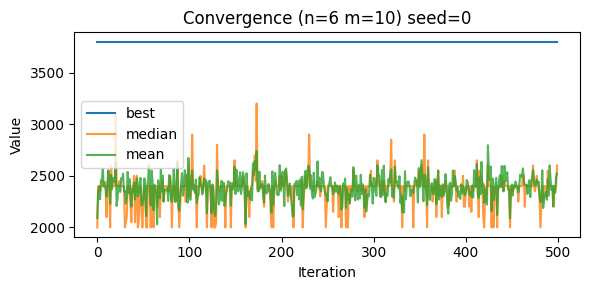


=== running seed 1
[iter 0/500] best=3800.0000 median=2100.0000 mean=2136.6667
[iter 50/500] best=3800.0000 median=2400.0000 mean=2405.0000
[iter 100/500] best=3800.0000 median=2400.0000 mean=2305.0000
[iter 150/500] best=3800.0000 median=2400.0000 mean=2233.3333
[iter 200/500] best=3800.0000 median=2400.0000 mean=2408.3333
[iter 250/500] best=3800.0000 median=2400.0000 mean=2383.3333
[iter 300/500] best=3800.0000 median=2150.0000 mean=2331.6667
[iter 350/500] best=3800.0000 median=2400.0000 mean=2445.0000
[iter 400/500] best=3800.0000 median=2400.0000 mean=2313.3333
[iter 450/500] best=3800.0000 median=2400.0000 mean=2410.0000
[iter 499/500] best=3800.0000 median=2400.0000 mean=2383.3333
Selected items: [1, 2, 5]
Value: 3800.0 Used per constraint: [66.0, 66.0, 14.0, 30.0, 41.0, 41.0, 0.0, 4.0, 10.0, 10.0]


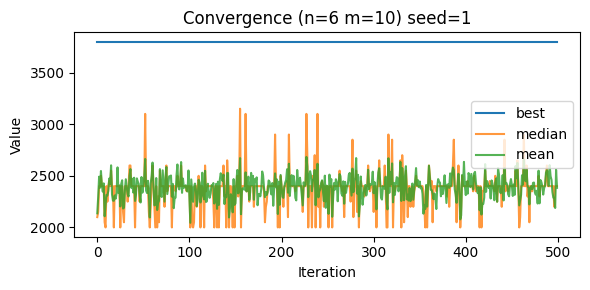


=== running seed 2
[iter 0/500] best=3800.0000 median=2400.0000 mean=2371.6667
[iter 50/500] best=3800.0000 median=2100.0000 mean=2213.3333
[iter 100/500] best=3800.0000 median=2150.0000 mean=2191.6667
[iter 150/500] best=3800.0000 median=2400.0000 mean=2413.3333
[iter 200/500] best=3800.0000 median=2400.0000 mean=2351.6667
[iter 250/500] best=3800.0000 median=2400.0000 mean=2458.3333
[iter 300/500] best=3800.0000 median=2450.0000 mean=2510.0000
[iter 350/500] best=3800.0000 median=2400.0000 mean=2236.6667
[iter 400/500] best=3800.0000 median=2000.0000 mean=2166.6667
[iter 450/500] best=3800.0000 median=2400.0000 mean=2418.3333
[iter 499/500] best=3800.0000 median=2300.0000 mean=2376.6667
Selected items: [1, 2, 5]
Value: 3800.0 Used per constraint: [66.0, 66.0, 14.0, 30.0, 41.0, 41.0, 0.0, 4.0, 10.0, 10.0]


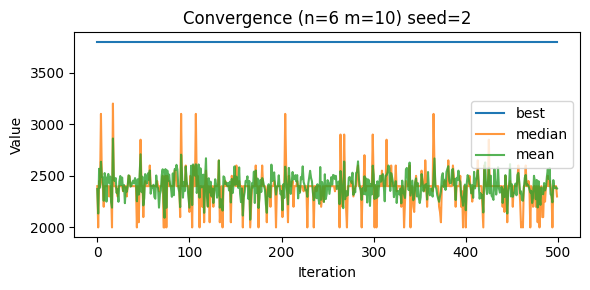



########## Instance 1  n= 10  m= 10  opt= 8706.1

=== running seed 0
[iter 0/500] best=8650.1000 median=5650.0000 mean=5478.5767
[iter 50/500] best=8706.1000 median=6518.4000 mean=6095.4050
[iter 100/500] best=8706.1000 median=6532.0000 mean=5755.0333
[iter 150/500] best=8706.1000 median=6534.4500 mean=6488.3150
[iter 200/500] best=8706.1000 median=6324.9000 mean=5973.6433
[iter 250/500] best=8706.1000 median=6862.2500 mean=6302.1900
[iter 300/500] best=8706.1000 median=6529.9000 mean=6058.3450
[iter 350/500] best=8706.1000 median=6058.1000 mean=5578.9883
[iter 400/500] best=8706.1000 median=7149.2500 mean=6337.7017
[iter 450/500] best=8706.1000 median=6532.0000 mean=5960.1000
[iter 499/500] best=8706.1000 median=6201.0500 mean=5985.5033
Selected items: [1, 3, 4, 7, 9]
Value: 8706.1 Used per constraint: [397.0, 539.0, 159.0, 302.0, 381.0, 430.0, 164.0, 300.0, 400.0, 470.0]


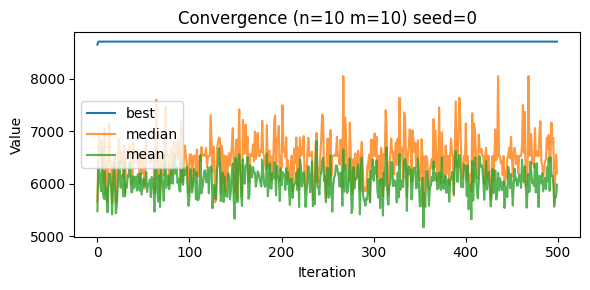


=== running seed 1
[iter 0/500] best=8650.1000 median=6481.1000 mean=5943.6550
[iter 50/500] best=8706.1000 median=6903.3500 mean=6207.0267
[iter 100/500] best=8706.1000 median=6687.2500 mean=5962.2783
[iter 150/500] best=8706.1000 median=6532.0000 mean=6207.8000
[iter 200/500] best=8706.1000 median=6532.0000 mean=6106.3417
[iter 250/500] best=8706.1000 median=7309.4000 mean=6769.5133
[iter 300/500] best=8706.1000 median=6534.4500 mean=6233.4867
[iter 350/500] best=8706.1000 median=5646.3000 mean=5553.4067
[iter 400/500] best=8706.1000 median=6252.4000 mean=5935.5167
[iter 450/500] best=8706.1000 median=6532.0000 mean=6128.2683
[iter 499/500] best=8706.1000 median=6325.2500 mean=5992.8417
Selected items: [1, 3, 4, 7, 9]
Value: 8706.1 Used per constraint: [397.0, 539.0, 159.0, 302.0, 381.0, 430.0, 164.0, 300.0, 400.0, 470.0]


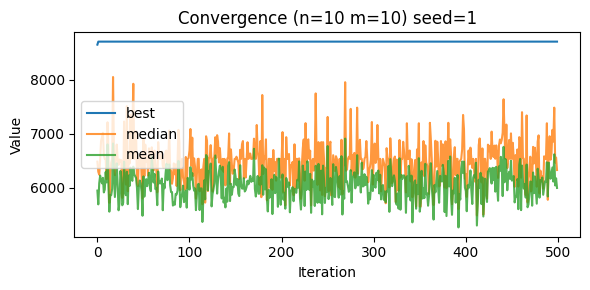


=== running seed 2
[iter 0/500] best=8360.5000 median=5970.6000 mean=5668.7600
[iter 50/500] best=8706.1000 median=6817.5000 mean=6315.8817
[iter 100/500] best=8706.1000 median=6520.6000 mean=6029.4800
[iter 150/500] best=8706.1000 median=7337.3000 mean=6154.1883
[iter 200/500] best=8706.1000 median=6341.8500 mean=5978.0233
[iter 250/500] best=8706.1000 median=6226.4000 mean=5910.5983
[iter 300/500] best=8706.1000 median=6721.3000 mean=6251.7217
[iter 350/500] best=8706.1000 median=6726.4000 mean=6337.7450
[iter 400/500] best=8706.1000 median=6221.8500 mean=6049.2033
[iter 450/500] best=8706.1000 median=6532.0000 mean=5919.5967
[iter 499/500] best=8706.1000 median=7354.8500 mean=6529.4000
Selected items: [1, 3, 4, 7, 9]
Value: 8706.1 Used per constraint: [397.0, 539.0, 159.0, 302.0, 381.0, 430.0, 164.0, 300.0, 400.0, 470.0]


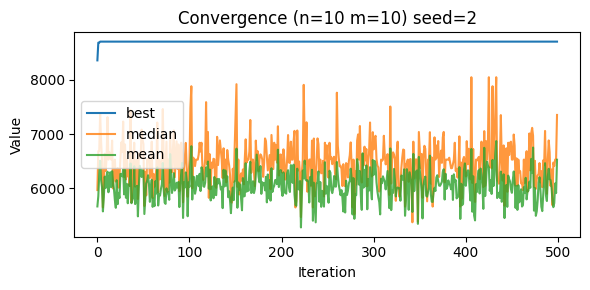



########## Instance 2  n= 15  m= 10  opt= 4015

=== running seed 0
[iter 0/500] best=3890.0000 median=2375.0000 mean=2319.5833
[iter 50/500] best=4015.0000 median=2380.0000 mean=2477.4167
[iter 100/500] best=4015.0000 median=2752.5000 mean=2706.5833
[iter 150/500] best=4015.0000 median=2545.0000 mean=2612.5000
[iter 200/500] best=4015.0000 median=2545.0000 mean=2597.9167
[iter 250/500] best=4015.0000 median=2480.0000 mean=2490.4167
[iter 300/500] best=4015.0000 median=2292.5000 mean=2358.7500
[iter 350/500] best=4015.0000 median=2617.5000 mean=2581.0000
[iter 400/500] best=4015.0000 median=2577.5000 mean=2629.5000
[iter 450/500] best=4015.0000 median=2700.0000 mean=2733.6667
[iter 499/500] best=4015.0000 median=2562.5000 mean=2592.5000
Selected items: [0, 1, 3, 5, 6, 8, 9, 13, 14]
Value: 4015.0 Used per constraint: [515.0, 665.0, 118.0, 207.0, 227.0, 239.0, 106.0, 201.0, 241.0, 262.0]


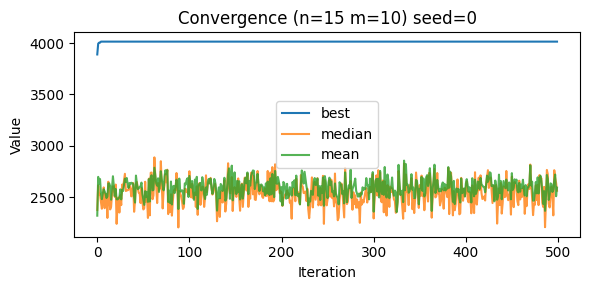


=== running seed 1
[iter 0/500] best=3950.0000 median=2547.5000 mean=2505.2500
[iter 50/500] best=4015.0000 median=2457.5000 mean=2556.3333
[iter 100/500] best=4015.0000 median=2492.5000 mean=2562.8333
[iter 150/500] best=4015.0000 median=2547.5000 mean=2695.0833
[iter 200/500] best=4015.0000 median=2550.0000 mean=2683.0833
[iter 250/500] best=4015.0000 median=2575.0000 mean=2644.3333
[iter 300/500] best=4015.0000 median=2520.0000 mean=2613.4167
[iter 350/500] best=4015.0000 median=2570.0000 mean=2602.8333
[iter 400/500] best=4015.0000 median=2572.5000 mean=2619.5833
[iter 450/500] best=4015.0000 median=2675.0000 mean=2704.8333
[iter 499/500] best=4015.0000 median=2485.0000 mean=2503.5833
Selected items: [0, 1, 3, 5, 6, 8, 9, 13, 14]
Value: 4015.0 Used per constraint: [515.0, 665.0, 118.0, 207.0, 227.0, 239.0, 106.0, 201.0, 241.0, 262.0]


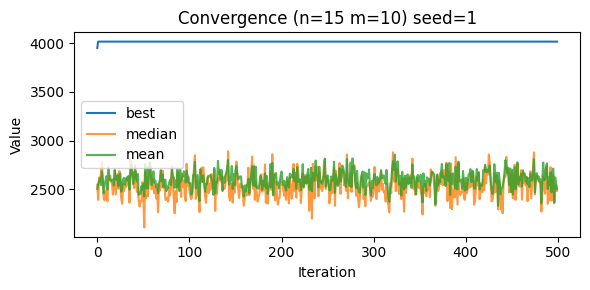


=== running seed 2
[iter 0/500] best=3695.0000 median=2382.5000 mean=2360.6667
[iter 50/500] best=4015.0000 median=2312.5000 mean=2524.7500
[iter 100/500] best=4015.0000 median=2485.0000 mean=2600.9167
[iter 150/500] best=4015.0000 median=2725.0000 mean=2673.5833
[iter 200/500] best=4015.0000 median=2490.0000 mean=2658.6667
[iter 250/500] best=4015.0000 median=2455.0000 mean=2562.5000
[iter 300/500] best=4015.0000 median=2585.0000 mean=2599.5833
[iter 350/500] best=4015.0000 median=2610.0000 mean=2597.0833
[iter 400/500] best=4015.0000 median=2425.0000 mean=2485.2500
[iter 450/500] best=4015.0000 median=2665.0000 mean=2595.9167
[iter 499/500] best=4015.0000 median=2480.0000 mean=2551.1667
Selected items: [0, 1, 3, 5, 6, 8, 9, 13, 14]
Value: 4015.0 Used per constraint: [515.0, 665.0, 118.0, 207.0, 227.0, 239.0, 106.0, 201.0, 241.0, 262.0]


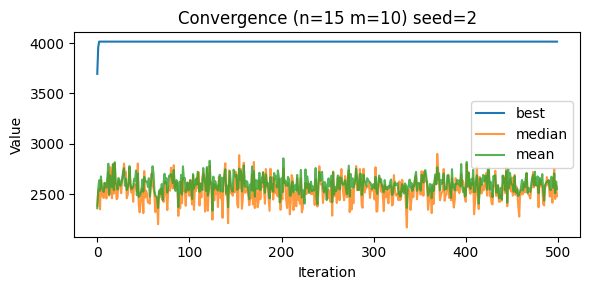



########## Instance 3  n= 20  m= 10  opt= 6120

=== running seed 0
[iter 0/500] best=5880.0000 median=3465.0000 mean=3746.1667
[iter 50/500] best=6110.0000 median=4560.0000 mean=4250.9167
[iter 100/500] best=6110.0000 median=3690.0000 mean=3886.2500
[iter 150/500] best=6120.0000 median=4695.0000 mean=4301.0833
[iter 200/500] best=6120.0000 median=4077.5000 mean=4067.1667
[iter 250/500] best=6120.0000 median=3952.5000 mean=4011.0000
[iter 300/500] best=6120.0000 median=4087.5000 mean=3954.9167
[iter 350/500] best=6120.0000 median=4132.5000 mean=4093.0000
[iter 400/500] best=6120.0000 median=4145.0000 mean=4008.1667
[iter 450/500] best=6120.0000 median=3865.0000 mean=3837.0000
[iter 499/500] best=6120.0000 median=4490.0000 mean=4291.6667
Selected items: [0, 9, 13, 14, 15, 16, 17, 18, 19]
Value: 6120.0 Used per constraint: [497.0, 699.0, 70.0, 193.0, 235.0, 256.0, 86.0, 177.0, 245.0, 275.0]


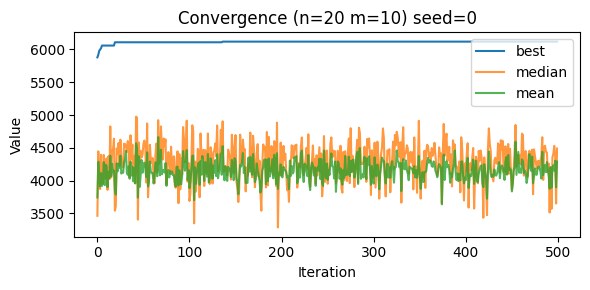


=== running seed 1
[iter 0/500] best=5880.0000 median=4180.0000 mean=4000.3333
[iter 50/500] best=6120.0000 median=3815.0000 mean=3802.6667
[iter 100/500] best=6120.0000 median=4530.0000 mean=4398.5833
[iter 150/500] best=6120.0000 median=4522.5000 mean=4314.3333
[iter 200/500] best=6120.0000 median=4135.0000 mean=4194.4167
[iter 250/500] best=6120.0000 median=4627.5000 mean=4297.5000
[iter 300/500] best=6120.0000 median=4552.5000 mean=4248.0000
[iter 350/500] best=6120.0000 median=4432.5000 mean=4300.8333
[iter 400/500] best=6120.0000 median=4495.0000 mean=4223.5000
[iter 450/500] best=6120.0000 median=4457.5000 mean=4270.5000
[iter 499/500] best=6120.0000 median=4055.0000 mean=4098.6667
Selected items: [0, 9, 13, 14, 15, 16, 17, 18, 19]
Value: 6120.0 Used per constraint: [497.0, 699.0, 70.0, 193.0, 235.0, 256.0, 86.0, 177.0, 245.0, 275.0]


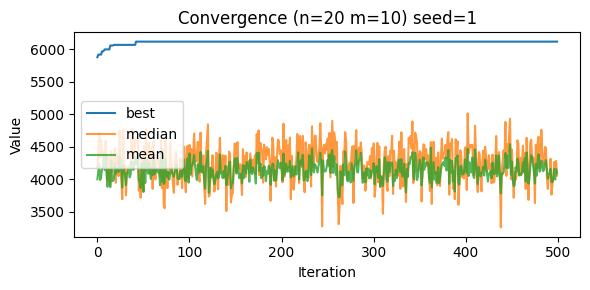


=== running seed 2
[iter 0/500] best=5880.0000 median=3980.0000 mean=3873.8333
[iter 50/500] best=6090.0000 median=4212.5000 mean=4120.2500
[iter 100/500] best=6120.0000 median=4222.5000 mean=3985.5833
[iter 150/500] best=6120.0000 median=4260.0000 mean=4109.7500
[iter 200/500] best=6120.0000 median=4060.0000 mean=4000.5000
[iter 250/500] best=6120.0000 median=4060.0000 mean=3936.9167
[iter 300/500] best=6120.0000 median=4152.5000 mean=4110.8333
[iter 350/500] best=6120.0000 median=4530.0000 mean=4393.7500
[iter 400/500] best=6120.0000 median=4442.5000 mean=4196.0833
[iter 450/500] best=6120.0000 median=4782.5000 mean=4187.0833
[iter 499/500] best=6120.0000 median=4205.0000 mean=4037.2500
Selected items: [0, 9, 13, 14, 15, 16, 17, 18, 19]
Value: 6120.0 Used per constraint: [497.0, 699.0, 70.0, 193.0, 235.0, 256.0, 86.0, 177.0, 245.0, 275.0]


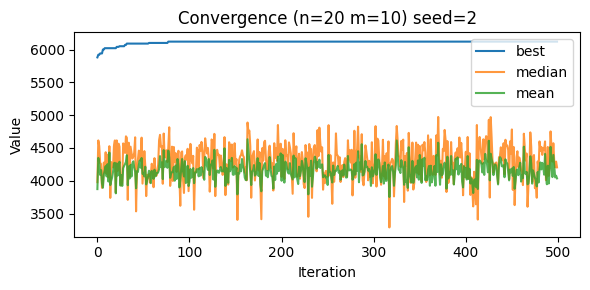



########## Instance 4  n= 28  m= 10  opt= 12400

=== running seed 0
[iter 0/500] best=11260.0000 median=8130.0000 mean=7566.1667
[iter 50/500] best=12390.0000 median=8510.0000 mean=8326.5833
[iter 100/500] best=12400.0000 median=8160.0000 mean=7952.3333
[iter 150/500] best=12400.0000 median=8185.0000 mean=8325.0000
[iter 200/500] best=12400.0000 median=8255.0000 mean=8473.5833
[iter 250/500] best=12400.0000 median=8345.0000 mean=8401.2500
[iter 300/500] best=12400.0000 median=8040.0000 mean=8110.0000
[iter 350/500] best=12400.0000 median=8417.5000 mean=8456.1667
[iter 400/500] best=12400.0000 median=8590.0000 mean=8378.0833
[iter 450/500] best=12400.0000 median=8327.5000 mean=8373.4167
[iter 499/500] best=12400.0000 median=8080.0000 mean=7914.3333
Selected items: [0, 1, 2, 8, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27]
Value: 12400.0 Used per constraint: [815.0, 1204.0, 173.0, 370.0, 443.0, 469.0, 146.0, 323.0, 453.0, 490.0]


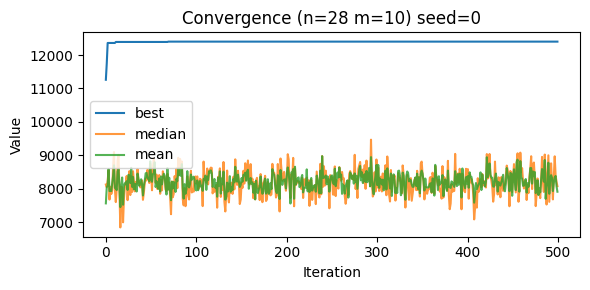


=== running seed 1
[iter 0/500] best=10910.0000 median=7660.0000 mean=7547.7500
[iter 50/500] best=12390.0000 median=7730.0000 mean=8029.7500
[iter 100/500] best=12390.0000 median=8572.5000 mean=8521.0000
[iter 150/500] best=12400.0000 median=8057.5000 mean=8209.5833
[iter 200/500] best=12400.0000 median=8125.0000 mean=8136.4167
[iter 250/500] best=12400.0000 median=7540.0000 mean=7986.5833
[iter 300/500] best=12400.0000 median=8020.0000 mean=8367.7500
[iter 350/500] best=12400.0000 median=8377.5000 mean=8400.6667
[iter 400/500] best=12400.0000 median=7945.0000 mean=8106.1667
[iter 450/500] best=12400.0000 median=7090.0000 mean=7524.8333
[iter 499/500] best=12400.0000 median=8427.5000 mean=8400.0833
Selected items: [0, 1, 2, 8, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27]
Value: 12400.0 Used per constraint: [815.0, 1204.0, 173.0, 370.0, 443.0, 469.0, 146.0, 323.0, 453.0, 490.0]


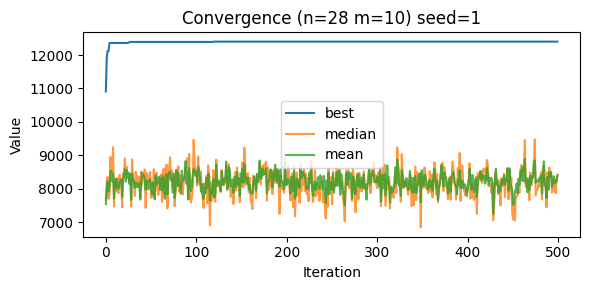


=== running seed 2
[iter 0/500] best=11640.0000 median=7680.0000 mean=7635.0000
[iter 50/500] best=12390.0000 median=8200.0000 mean=8328.7500
[iter 100/500] best=12390.0000 median=8707.5000 mean=8556.0000
[iter 150/500] best=12390.0000 median=8120.0000 mean=7983.7500
[iter 200/500] best=12400.0000 median=8325.0000 mean=8140.4167
[iter 250/500] best=12400.0000 median=8080.0000 mean=8104.5000
[iter 300/500] best=12400.0000 median=8082.5000 mean=8026.4167
[iter 350/500] best=12400.0000 median=8545.0000 mean=8487.8333
[iter 400/500] best=12400.0000 median=8425.0000 mean=8341.3333
[iter 450/500] best=12400.0000 median=8125.0000 mean=8139.4167
[iter 499/500] best=12400.0000 median=7702.5000 mean=7887.8333
Selected items: [0, 1, 2, 8, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27]
Value: 12400.0 Used per constraint: [815.0, 1204.0, 173.0, 370.0, 443.0, 469.0, 146.0, 323.0, 453.0, 490.0]


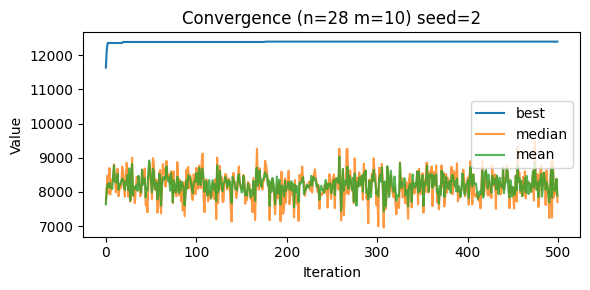



########## Instance 5  n= 39  m= 5  opt= 10618

=== running seed 0
[iter 0/500] best=9610.0000 median=7428.5000 mean=6722.7667
[iter 50/500] best=10527.0000 median=7485.0000 mean=7334.9500
[iter 100/500] best=10547.0000 median=7485.0000 mean=7323.6333
[iter 150/500] best=10549.0000 median=7485.0000 mean=7334.2000
[iter 200/500] best=10549.0000 median=8080.5000 mean=7593.0833
[iter 250/500] best=10549.0000 median=7467.5000 mean=7144.5500
[iter 300/500] best=10588.0000 median=6492.5000 mean=6772.4167
[iter 350/500] best=10588.0000 median=7334.5000 mean=7142.2333
[iter 400/500] best=10588.0000 median=7485.0000 mean=7350.4500
[iter 450/500] best=10588.0000 median=7762.0000 mean=7517.5000
[iter 499/500] best=10588.0000 median=7485.0000 mean=7387.8000
Selected items: [0, 3, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38]
Value: 10588.0 Used per constraint: [598.0, 494.0, 493.0, 416.0, 599.0]


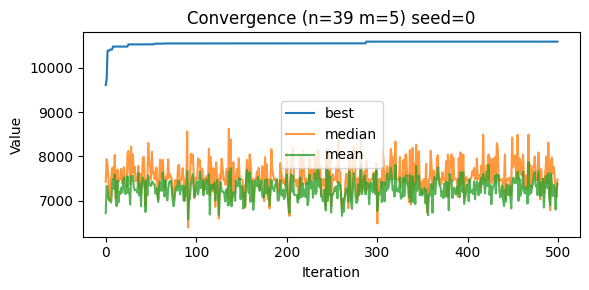


=== running seed 1
[iter 0/500] best=9554.0000 median=7470.5000 mean=7069.5833
[iter 50/500] best=10566.0000 median=6783.0000 mean=6918.0500
[iter 100/500] best=10586.0000 median=7814.5000 mean=7530.6167
[iter 150/500] best=10586.0000 median=7974.5000 mean=7697.7333
[iter 200/500] best=10586.0000 median=7645.5000 mean=7405.4833
[iter 250/500] best=10586.0000 median=8050.0000 mean=7607.1000
[iter 300/500] best=10588.0000 median=7485.0000 mean=7262.1667
[iter 350/500] best=10588.0000 median=7462.0000 mean=7076.1500
[iter 400/500] best=10604.0000 median=6529.5000 mean=6725.7833
[iter 450/500] best=10604.0000 median=7485.0000 mean=7168.8167
[iter 499/500] best=10604.0000 median=7485.0000 mean=7026.6833
Selected items: [0, 3, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37, 38]
Value: 10604.0 Used per constraint: [598.0, 495.0, 498.0, 418.0, 600.0]


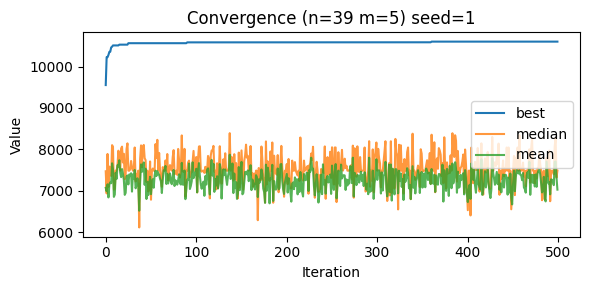


=== running seed 2
[iter 0/500] best=9638.0000 median=6779.5000 mean=6638.7500
[iter 50/500] best=10587.0000 median=8045.0000 mean=7353.3667
[iter 100/500] best=10605.0000 median=7485.0000 mean=7316.9833
[iter 150/500] best=10605.0000 median=8005.0000 mean=7509.7333
[iter 200/500] best=10605.0000 median=7485.0000 mean=7284.0833
[iter 250/500] best=10605.0000 median=7485.0000 mean=7223.4000
[iter 300/500] best=10605.0000 median=7712.0000 mean=7568.4833
[iter 350/500] best=10605.0000 median=6329.5000 mean=6762.7667
[iter 400/500] best=10605.0000 median=7638.0000 mean=7223.7500
[iter 450/500] best=10605.0000 median=7485.0000 mean=7238.2333
[iter 499/500] best=10605.0000 median=7485.0000 mean=6957.9333
Selected items: [0, 1, 3, 5, 7, 8, 10, 12, 13, 14, 15, 16, 17, 18, 22, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38]
Value: 10605.0 Used per constraint: [597.0, 495.0, 489.0, 423.0, 600.0]


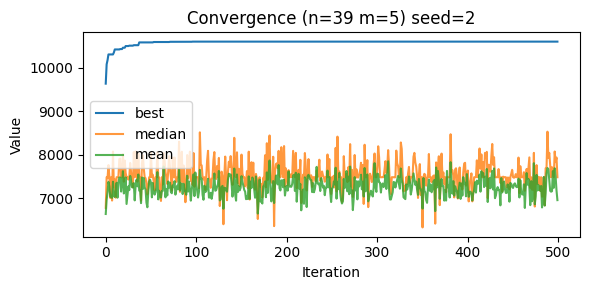

,instance_n,m,seed,best_value,selected,used,instance_idx
0,6,10,0,3800.0,"[1, 2, 5]","[66.0, 66.0, 14.0, 30.0, 41.0, 41.0, 0.0, 4.0,...",0
1,6,10,1,3800.0,"[1, 2, 5]","[66.0, 66.0, 14.0, 30.0, 41.0, 41.0, 0.0, 4.0,...",0
2,6,10,2,3800.0,"[1, 2, 5]","[66.0, 66.0, 14.0, 30.0, 41.0, 41.0, 0.0, 4.0,...",0
3,10,10,0,8706.1,"[1, 3, 4, 7, 9]","[397.0, 539.0, 159.0, 302.0, 381.0, 430.0, 164...",1
4,10,10,1,8706.1,"[1, 3, 4, 7, 9]","[397.0, 539.0, 159.0, 302.0, 381.0, 430.0, 164...",1
5,10,10,2,8706.1,"[1, 3, 4, 7, 9]","[397.0, 539.0, 159.0, 302.0, 381.0, 430.0, 164...",1
6,15,10,0,4015.0,"[0, 1, 3, 5, 6, 8, 9, 13, 14]","[515.0, 665.0, 118.0, 207.0, 227.0, 239.0, 106...",2
7,15,10,1,4015.0,"[0, 1, 3, 5, 6, 8, 9, 13, 14]","[515.0, 665.0, 118.0, 207.0, 227.0, 239.0, 106...",2
8,15,10,2,4015.0,"[0, 1, 3, 5, 6, 8, 9, 13, 14]","[515.0, 665.0, 118.0, 207.0, 227.0, 239.0, 106...",2
9,20,10,0,6120.0,"[0, 9, 13, 14, 15, 16, 17, 18, 19]","[497.0, 699.0, 70.0, 193.0, 235.0, 256.0, 86.0...",3


In [2]:
# Paste this whole block into a Jupyter cell and run.
import re, random, time
from typing import List, Tuple
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# =========================
# Parser for mknap style file
# =========================
def parse_mknap_file(path: str):
    """Parse an OR-Library mknap file (mknap1.txt style).
    Returns a list of instances, each a dict with keys:
      'n','m','opt','p' (list), 'R' (m x n matrix), 'b' (list)
    """
    with open(path, 'r') as f:
        text = f.read()
    # extract numbers (ints or floats)
    toks = re.findall(r'[-+]?\d*\.\d+|\d+', text)
    nums = [float(t) if '.' in t else int(t) for t in toks]
    idx = 0
    K = int(nums[idx]); idx += 1
    instances = []
    for _ in range(K):
        n = int(nums[idx]); m = int(nums[idx+1]); opt = nums[idx+2]; idx += 3
        # read profits p (n numbers)
        p = [float(nums[idx + i]) for i in range(n)]; idx += n
        # read m * n resource coefficients (row-major: each constraint is n numbers)
        R = []
        for _c in range(m):
            row = [float(nums[idx + j]) for j in range(n)]
            R.append(row)
            idx += n
        # read b (m numbers)
        b = [float(nums[idx + i]) for i in range(m)]; idx += m
        instances.append({'n': n, 'm': m, 'opt': opt, 'p': p, 'R': R, 'b': b})
    return instances

# =========================
# Feasibility / repair / value for MDKP
# =========================
def is_feasible(x: List[int], R: List[List[float]], b: List[float]) -> bool:
    m = len(R)
    for i in range(m):
        used = sum(R[i][j] * x[j] for j in range(len(x)))
        if used > b[i] + 1e-9:  # small tolerance
            return False
    return True

def repair_multidim(x: List[int], p: List[float], R: List[List[float]], b: List[float]) -> List[int]:
    """Greedy repair: while infeasible, remove selected item with smallest
    profit / normalized-resource-usage score."""
    x = x[:]  # copy
    n = len(x)
    m = len(R)
    # Convert R to columns for faster per-item access
    # But we'll just index R[i][j]
    while not is_feasible(x, R, b):
        # compute normalized load for each item: sum(R[i][j] / b[i]) (use b[i]>0)
        scores = {}
        for j in range(n):
            if x[j] == 0:
                continue
            norm_use = 0.0
            for i in range(m):
                denom = b[i] if b[i] > 0 else 1.0
                norm_use += (R[i][j] / denom)
            # score: profit per normalized resource use (lower -> better to remove)
            # add small constant to denom to avoid division by 0
            scores[j] = p[j] / (1.0 + norm_use)
        if not scores:
            break  # nothing to remove (shouldn't happen)
        # remove item with smallest score
        j_remove = min(scores.keys(), key=lambda j: scores[j])
        x[j_remove] = 0
    return x

def value_after_repair(x: List[int], p: List[float], R: List[List[float]], b: List[float]) -> float:
    x_repaired = repair_multidim(x, p, R, b)
    return sum(p[j] * x_repaired[j] for j in range(len(x_repaired))), x_repaired

# =========================
# Bees Algorithm (multidim)
# =========================
def bees_algorithm_mdkp(p: List[float], R: List[List[float]], b: List[float],
                       n: int = 50, nre: int = 3, nrb: int = 7,
                       nep: int = 8, nsp: int = 20, ngh: int = 3,
                       iters: int = 200, seed: int = 0, print_every: int = 50):
    """
    BA adapted for MDKP. Returns (best_x, best_val, curves_dict)
    curves_dict contains 'best', 'median', 'mean'.
    """
    random.seed(seed)
    n_items = len(p)
    scouts = [[random.randint(0,1) for _ in range(n_items)] for _ in range(n)]
    best_x = None
    best_val = -float('inf')
    best_curve, median_curve, mean_curve = [], [], []

    for iter_idx in range(iters):
        # evaluate population (repair each to ensure feasibility when computing 'value')
        evals = []
        for x in scouts:
            val, x_r = value_after_repair(x, p, R, b)
            evals.append((x, val, x_r))
        # sort by value descending
        evals.sort(key=lambda t: t[1], reverse=True)

        # update best
        if evals[0][1] > best_val:
            best_val = evals[0][1]
            best_x = evals[0][2]  # store repaired feasible solution
        best_curve.append(best_val)

        # population statistics (before recruitment)
        vals = [t[1] for t in evals]
        median_curve.append(float(pd.Series(vals).median()))
        mean_curve.append(float(sum(vals)/len(vals)))

        # periodic print
        if (iter_idx % print_every) == 0 or iter_idx == iters-1:
            print(f"[iter {iter_idx}/{iters}] best={best_val:.4f} median={median_curve[-1]:.4f} mean={mean_curve[-1]:.4f}")

        # select best sites
        sites = evals[:nrb]
        new_scouts = []

        for i_site, (x_orig, _, _) in enumerate(sites):
            recruits = nep if i_site < nre else nsp
            local_best = x_orig[:]
            local_best_val, _ = value_after_repair(local_best, p, R, b)
            for _ in range(recruits):
                # mutation: mostly small flips, occasional bigger jump
                y = local_best[:]
                if random.random() < 0.1:  # big jump 10%
                    flips = random.randint(1, max(1, ngh*3))
                else:
                    flips = random.randint(1, max(1, ngh))
                for _ in range(flips):
                    j = random.randrange(n_items)
                    y[j] ^= 1
                # evaluate y (repair internally)
                y_val, y_r = value_after_repair(y, p, R, b)
                if y_val > local_best_val:
                    local_best, local_best_val = y, y_val
            new_scouts.append(local_best)

        # fill rest with random scouts
        while len(new_scouts) < n:
            new_scouts.append([random.randint(0,1) for _ in range(n_items)])

        scouts = new_scouts

    curves = {'best': best_curve, 'median': median_curve, 'mean': mean_curve}
    # final ensure best_x is repaired feasible
    best_x = repair_multidim(best_x if best_x is not None else scouts[0], p, R, b)
    return best_x, best_val, curves

# =========================
# Helpers to run experiments and plot
# =========================
def run_instance_ba(instance: dict, seeds=[0,1,2,3,4,5,6,7,8,9],
                    ba_params=None, iters=500, plot=True):
    """Run BA on a single instance for given seeds, return DataFrame of bests."""
    if ba_params is None:
        ba_params = dict(n=50, nre=3, nrb=7, nep=8, nsp=20, ngh=3)
    results = []
    for s in seeds:
        print("\n=== running seed", s)
        x_best, val_best, curves = bees_algorithm_mdkp(
            p=instance['p'], R=instance['R'], b=instance['b'],
            iters=iters, seed=s, print_every=max(1, iters//10), **ba_params)
        used_per_constraint = [sum(instance['R'][i][j]*x_best[j] for j in range(instance['n'])) for i in range(instance['m'])]
        selected_items = [j for j,bit in enumerate(x_best) if bit==1]
        print("Selected items:", selected_items)
        print("Value:", val_best, "Used per constraint:", used_per_constraint)
        results.append({'instance_n': instance['n'], 'm': instance['m'], 'seed': s,
                        'best_value': val_best, 'selected': selected_items,
                        'used': used_per_constraint})
        # plot curves for this seed
        if plot:
            plt.figure(figsize=(6,3))
            plt.plot(curves['best'], label='best')
            plt.plot(curves['median'], label='median', alpha=0.8)
            plt.plot(curves['mean'], label='mean', alpha=0.8)
            plt.xlabel('Iteration'); plt.ylabel('Value')
            plt.title(f"Convergence (n={instance['n']} m={instance['m']}) seed={s}")
            plt.legend()
            plt.tight_layout()
            plt.show()

    df = pd.DataFrame(results)
    return df

# =========================
# Example: how to run on mknap1.txt
# =========================
file_path = "Knapsack instances/mknap1.txt"  # change if needed
instances = parse_mknap_file(file_path)
# run the first K instances with few seeds for quick testing:
res_all = []
for i, inst in enumerate(instances[:6]):   # change slice to pick instances you want
    print("\n\n########## Instance", i, " n=", inst['n'], " m=", inst['m'], " opt=", inst['opt'])
    df = run_instance_ba(inst, seeds=[0,1,2], ba_params=dict(n=60, nre=3, nrb=8, nep=12, nsp=25, ngh=5),
                         iters=500, plot=True)
    df['instance_idx'] = i
    res_all.append(df)
summary_df = pd.concat(res_all, ignore_index=True)
display(summary_df)

# Problem 5 — Q-learning on FrozenLake

Environment: 8x8 | States: 64, Actions: 4
Using algorithm: SARSA (on-policy)
Ep 1000/200000 | Last1000 avg: -0.028 | Eps: 0.905 | MaxQ: 0.10
Ep 2000/200000 | Last1000 avg: -0.024 | Eps: 0.819 | MaxQ: 0.24
Ep 3000/200000 | Last1000 avg: -0.024 | Eps: 0.741 | MaxQ: 0.24
Ep 4000/200000 | Last1000 avg: -0.017 | Eps: 0.670 | MaxQ: 0.34
Ep 5000/200000 | Last1000 avg: -0.019 | Eps: 0.607 | MaxQ: 0.25
Ep 6000/200000 | Last1000 avg: -0.016 | Eps: 0.549 | MaxQ: 0.33
Ep 7000/200000 | Last1000 avg: -0.014 | Eps: 0.497 | MaxQ: 0.38
Ep 8000/200000 | Last1000 avg: -0.014 | Eps: 0.449 | MaxQ: 0.46
Ep 9000/200000 | Last1000 avg: -0.014 | Eps: 0.407 | MaxQ: 0.32
Ep 10000/200000 | Last1000 avg: -0.013 | Eps: 0.368 | MaxQ: 0.23
Ep 11000/200000 | Last1000 avg: -0.012 | Eps: 0.333 | MaxQ: 0.29
Ep 12000/200000 | Last1000 avg: -0.010 | Eps: 0.301 | MaxQ: 0.31
Ep 13000/200000 | Last1000 avg: -0.010 | Eps: 0.273 | MaxQ: 0.38
Ep 14000/200000 | Last1000 avg: -0.010 | Eps: 0.247 | MaxQ: 0.38
Ep 15000/200000 | Last

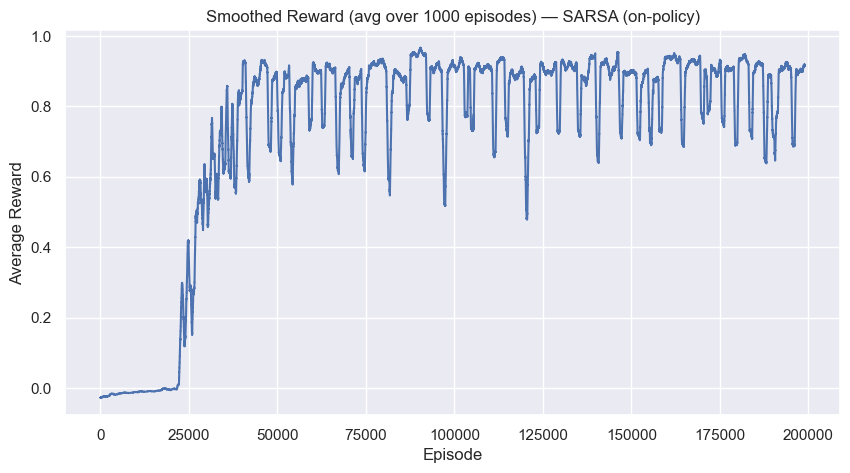

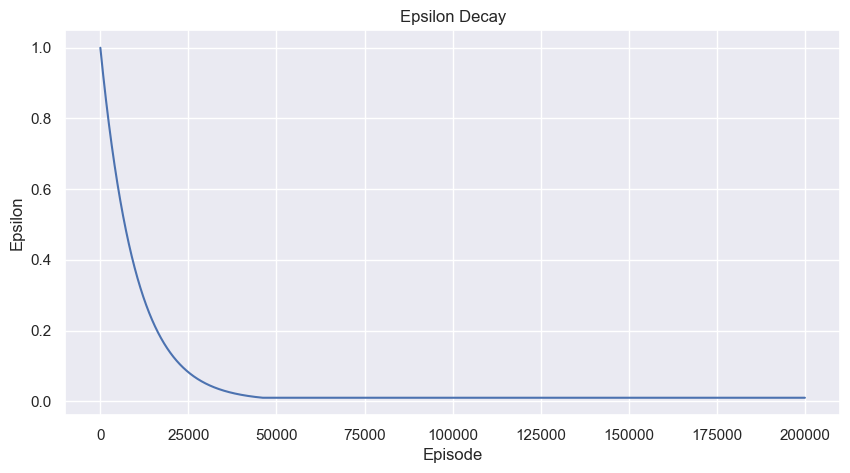

In [12]:
# --- Imports ---
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
CONFIG = {
    'env_name': 'FrozenLake-v1',
    'map_name': '8x8',             # '4x4' → Q-learning, '8x8' → SARSA
    'is_slippery': True,           # Keep True for challenge
    'alpha': 0.1,                  # Learning rate
    'gamma': 0.95,                 # Discount factor
    'epsilon': 1.0,                # Starting exploration rate
    'epsilon_min': 0.01,
    'epsilon_decay': 0.9999,       # slower decay for large maps
    'episodes': 200000,            # more episodes for 8x8
    'max_steps': 1000,              # allow more steps per episode
    'seed': 42
}

# --- Set seeds ---
np.random.seed(CONFIG['seed'])
random.seed(CONFIG['seed'])

# --- Initialize environment ---
env = gym.make(CONFIG['env_name'], map_name=CONFIG['map_name'], is_slippery=CONFIG['is_slippery'])
env.reset(seed=CONFIG['seed'])
n_states = env.observation_space.n
n_actions = env.action_space.n
print(f"Environment: {CONFIG['map_name']} | States: {n_states}, Actions: {n_actions}")

# --- Q-Learning Agent ---
class QLearningAgent:
    def __init__(self, n_states, n_actions, alpha, gamma, epsilon, epsilon_min, epsilon_decay):
        self.n_states = n_states
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.Q = np.zeros((n_states, n_actions))

    def choose_action(self, state):
        if random.random() < self.epsilon:
            return random.randint(0, self.n_actions - 1)
        return np.argmax(self.Q[state])

    def update(self, s, a, r, s_next, done):
        best_next = np.max(self.Q[s_next])
        target = r + (0 if done else self.gamma * best_next)
        self.Q[s, a] += self.alpha * (target - self.Q[s, a])

    def decay_epsilon(self):
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

# --- SARSA Agent (on-policy) ---
class SARSAAgent(QLearningAgent):
    def update(self, s, a, r, s_next, done, a_next):
        target = r + (0 if done else self.gamma * self.Q[s_next, a_next])
        self.Q[s, a] += self.alpha * (target - self.Q[s, a])

# --- Select algorithm ---
if CONFIG['map_name'] == '8x8':
    agent = SARSAAgent(n_states, n_actions,
                       CONFIG['alpha'], CONFIG['gamma'],
                       CONFIG['epsilon'], CONFIG['epsilon_min'],
                       CONFIG['epsilon_decay'])
    algo_name = "SARSA (on-policy)"
else:
    agent = QLearningAgent(n_states, n_actions,
                           CONFIG['alpha'], CONFIG['gamma'],
                           CONFIG['epsilon'], CONFIG['epsilon_min'],
                           CONFIG['epsilon_decay'])
    algo_name = "Q-learning (off-policy)"

print(f"Using algorithm: {algo_name}")

# --- Training Loop ---
rewards_per_episode = []
epsilons = []

for episode in range(CONFIG['episodes']):
    state, _ = env.reset(seed=CONFIG['seed'])
    total_reward = 0

    # choose first action (SARSA needs it)
    action = agent.choose_action(state)

    for step in range(CONFIG['max_steps']):
        next_state, reward, done, truncated, _ = env.step(action)

        # Reward shaping (helps learning in 8x8)
        if CONFIG['map_name'] == '8x8' and reward == 0 and not done:
            reward = -0.001

        if isinstance(agent, SARSAAgent):
            next_action = agent.choose_action(next_state)
            agent.update(state, action, reward, next_state, done, next_action)
            action = next_action
        else:
            agent.update(state, action, reward, next_state, done)
            action = agent.choose_action(next_state)

        state = next_state
        total_reward += reward
        if done or truncated:
            break

    agent.decay_epsilon()
    rewards_per_episode.append(total_reward)
    epsilons.append(agent.epsilon)

    # --- Live feedback ---
    if (episode + 1) % 1000 == 0:
        avg = np.mean(rewards_per_episode[-1000:])
        print(f"Ep {episode + 1}/{CONFIG['episodes']} | "
              f"Last1000 avg: {avg:.3f} | "
              f"Eps: {agent.epsilon:.3f} | MaxQ: {agent.Q.max():.2f}")

print("\nTraining completed ✅")

# --- Evaluation (greedy policy) ---
n_eval_episodes = 200
successes = 0
steps_list = []

for _ in range(n_eval_episodes):
    state, _ = env.reset(seed=CONFIG['seed'])
    for step in range(CONFIG['max_steps']):
        action = np.argmax(agent.Q[state])
        next_state, reward, done, truncated, _ = env.step(action)
        state = next_state
        if done or truncated:
            if reward > 0:
                successes += 1
            steps_list.append(step + 1)
            break

success_rate = successes / n_eval_episodes
print(f"Evaluation over {n_eval_episodes} episodes ({algo_name}):")
print(f"  Success rate: {success_rate*100:.1f}%")
print(f"  Avg steps (successful episodes): {np.mean(steps_list) if steps_list else 0:.2f}")

# --- Inspect learned Q-values ---
print("\nSample Q-values (first 10 states):")
print(agent.Q[:10])

# --- Plot learning progress ---
sns.set(style="darkgrid")
window = 1000
smoothed_rewards = np.convolve(rewards_per_episode, np.ones(window)/window, mode='valid')

plt.figure(figsize=(10, 5))
plt.plot(smoothed_rewards)
plt.title(f"Smoothed Reward (avg over {window} episodes) — {algo_name}")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epsilons)
plt.title("Epsilon Decay")
plt.xlabel("Episode")
plt.ylabel("Epsilon")
plt.show()